In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_theme(style="white")
color = sns.color_palette("viridis")[3]


import warnings
warnings.filterwarnings('ignore')

In [2]:
economic_income_date = pd.read_excel('income.xlsx', sheet_name='List of economies')
composition_income_data = pd.read_excel('income.xlsx', sheet_name='composition')

economic_income_date.head()
composition_income_data.head()

,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,AFE,Africa Eastern and Southern,AGO,Angola
1,AFE,Africa Eastern and Southern,BWA,Botswana
2,AFE,Africa Eastern and Southern,BDI,Burundi
3,AFE,Africa Eastern and Southern,COM,Comoros
4,AFE,Africa Eastern and Southern,COD,"Congo, Dem. Rep."


In [3]:
composition_income_data.WB_Country_Name.nunique()

218

In [4]:
url = "https://raw.githubusercontent.com/datagus/ASDA2025/refs/heads/main/datasets/homework_week5/world_bank_development_indicators.csv"

df = pd.read_csv(url)
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.477056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.751356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.466667e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.040239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.511112e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.343888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [5]:
# merging dataframes into one table

final_df = pd.merge(df, economic_income_date, left_on='country', right_on='Economy', how='left')
final_df = pd.merge(final_df, composition_income_data, left_on='Code', right_on='WB_Country_Code', how='left')
final_df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan
2,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IBT,IDA & IBRD total,AFG,Afghanistan
3,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDX,IDA only,AFG,Afghanistan
4,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDA,IDA total,AFG,Afghanistan


In [6]:
print("Number of total rows and columns:", final_df.shape)

Number of total rows and columns: (132431, 59)


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132431 entries, 0 to 132430
Data columns (total 59 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   country                                    132431 non-null  object 
 1   date                                       132431 non-null  object 
 2   agricultural_land%                         114011 non-null  float64
 3   forest_land%                               63904 non-null   float64
 4   land_area                                  114698 non-null  float64
 5   avg_precipitation                          100174 non-null  float64
 6   trade_in_services%                         72219 non-null   float64
 7   control_of_corruption_estimate             46307 non-null   float64
 8   control_of_corruption_std                  46307 non-null   float64
 9   access_to_electricity%                     56345 non-null   float64
 10  renewvab

In [8]:
# checking datatypes
print(final_df.dtypes)

country                                       object
date                                          object
agricultural_land%                           float64
forest_land%                                 float64
land_area                                    float64
avg_precipitation                            float64
trade_in_services%                           float64
control_of_corruption_estimate               float64
control_of_corruption_std                    float64
access_to_electricity%                       float64
renewvable_energy_consumption%               float64
electric_power_consumption                   float64
CO2_emisions                                 float64
other_greenhouse_emisions                    float64
population_density                           float64
inflation_annual%                            float64
real_interest_rate                           float64
risk_premium_on_lending                      float64
research_and_development_expenditure%        f

In [9]:
final_df.country.unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

In [10]:
final_df.describe(include='all')

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
count,132431,132431,114011.000000,63904.000000,1.146980e+05,100174.000000,72219.000000,46307.000000,46307.000000,56345.000000,63114.000000,54322.000000,6.087300e+04,6.087300e+04,114437.000000,85519.000000,44338.000000,23841.000000,19378.000000,16692.000000,39897.000000,37232.000000,46002.000000,46002.000000,5893.000000,1894.000000,3483.000000,12432.000000,63774.000000,10730.000000,76336.000000,1.021570e+05,46555.000000,46555.000000,47123.000000,47123.000000,46034.000000,46034.000000,47062.000000,40413.000000,3706.000000,18734.000000,126046.000000,125992.000000,125296.000000,1.295100e+05,1.286910e+05,47057.000000,47057.000000,34516.000000,131378,131378,128630,127478,104694,128630,128630,128630,128630
unique,274,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,256,7,4,3,48,48,211,211
top,Comoros,1992-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comoros,COM,Sub-Saharan Africa,Lower middle income,IDA,WLD,World,COM,Comoros
freq,1152,2078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1152,1152,38144,38006,47936,13471,13471,1152,1152
mean,NaN,NaN,37.802507,33.477443,1.167840e+06,1231.969543,22.628627,-0.229242,0.201892,74.257875,36.651025,2394.116922,2.166072e+05,3.143227e+05,196.329657,25.743899,5.601805,6.384054,0.818836,57.488330,16.573992,25.957880,-0.252224,0.237774,0.532701,106.794087,28.947345,61.090594,20.868499,2.737284,2.586510,2.712888e+11,-0.166554,0.278056,-0.226495,0.201196,-0.241398,0.228952,4.299877,2.961704,28.266737,38.734643,30.669713,11.134117,62.284819,4.936386e+07,2.827400e+07,-0.151945,0.163083,8.838962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,21.719746,25.276741,5.461130e+06,807.448407,23.369565,0.905936,0.082804,32.316065,31.863046,3785.237543,1.322947e+06,1.792354e+06,1035.827782,370.035844,16.477519,7.273572,0.865514,64.886152,8.005342,12.699631,0.908455,0.069432,0.138630,52.816759,28.378696,17.128185,27.857521,0.528930,2.865738,2.132033e+12,0.986020,0.075788,0.917084,0.097319,0.908980,0.069921,2.049548,2.249400,11.479475,9.098144,12.934237,5.940497,11.432542,2.805120e+08,1.643494e+08,0.954084,0.056985,12.869166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,0.000000e+00,7.616981e+00,0.098625,-17.640424,-97.693477,-31.502949,0.005440,-1.170726,0.000059,0.000125,-2.43996

## Cleaning data

In [11]:
final_df.country.unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

In [12]:
# List of non-country labels to remove
invalid_names = [
    'World', 'High income', 'Low income', 'Lower middle income',
    'Upper middle income', 'OECD members', 'Euro area', 'European Union',
    'Arab World', 'Latin America & Caribbean', 'Sub-Saharan Africa',
    'East Asia & Pacific', 'South Asia', 'Middle East & North Africa',
    'North America', 'Post-demographic dividend', 'Pre-demographic dividend',
    'IDA total', 'IDA blend', 'IDA only', 'IBRD only',
    'Fragile and conflict affected situations', 'Small states',
    'Caribbean small states', 'Pacific island small states', 
    'Sub-Saharan Africa (IDA & IBRD)', 
    'Middle East & North Africa (IDA & IBRD)', 
    'Europe & Central Asia (IDA & IBRD)',
    'East Asia & Pacific (IDA & IBRD)',
    'Latin America & Caribbean (IDA & IBRD)',
    'East Asia & Pacific (excluding high income)',
    'Europe & Central Asia (excluding high income)',
    'East Asia & Pacific (excluding high income)',
    'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 
    'Europe & Central Asia (IDA & IBRD)', 
    'Europe & Central Asia (excluding high income)', 'Early-demographic dividend', 'Africa Eastern and Southern', 
    'Early-demographic dividend', 'Early-demographic dividend',  'East Asia & Pacific (IDA & IBRD countries)', 
    'Africa Western and Central',  'Heavily indebted poor countries', 'IDA  IBRD total', 'Heavily indebted poor countries',
    "Arab World","Caribbean small states","Central African Republic","Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific","East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (IDA & IBRD)","East Asia & Pacific (excluding high income)",
    "Euro area","Europe & Central Asia","Europe & Central Asia (IDA & IBRD countries)",
    "Europe & Central Asia (IDA & IBRD)","Europe & Central Asia (excluding high income)",
    "European Union","Fragile and conflict affected situations","Heavily indebted poor countries (HIPC)",
    "IDA & IBRD total","IDA blend","IDA only","IDA total","Late-demographic dividend",
    "Latin America & Caribbean","Latin America & Caribbean (IDA & IBRD)",
    "Latin America & Caribbean (excluding high income)","Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification","Low & middle income","Low income","Lower middle income",
    "Micronesia, Fed. Sts.","Middle East & North Africa","Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (IDA & IBRD)","Middle East & North Africa (excluding high income)",
    "Middle income","Northern Mariana Islands","Not classified","OECD members","Other small states",
    "Pacific island small states","Post-demographic dividend","Pre-demographic dividend","Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)","Sub-Saharan Africa (IDA & IBRD)","Sub-Saharan Africa (excluding high income)"
]

df = final_df[~final_df['country'].isin(invalid_names)].copy()
df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,risk_premium_on_lending,research_and_development_expenditure%,central_goverment_debt%,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,human_capital_index,doing_business,time_to_get_operation_license,statistical_performance_indicators,individuals_using_internet%,logistic_performance_index,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan
2,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IBT,IDA & IBRD total,AFG,Afghanistan
3,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDX,IDA only,AFG,Afghanistan
4,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDA,IDA total,AFG,Afghanistan


In [13]:
df['country'] = (
    df['country']
    .str.replace(r'\(.*?\)', '', regex=True)   # remove text in brackets
    .str.replace(r'[^a-zA-Z\s\-]', '', regex=True)  # remove weird chars
    .str.strip()
)

In [14]:
fix_map = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran',
    'Venezuela, RB': 'Venezuela',
    'Korea, Rep.': 'South Korea',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Gambia, The': 'Gambia',
    'Bahamas, The': 'Bahamas',
    'Yemen, Rep.': 'Yemen'
}

df['country'] = df['country'].replace(fix_map)

In [15]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo Dem Rep', 'Congo Rep', 'Costa Rica', 'Cote dIvoire',
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt Arab Rep', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands',
       'Fiji', 'Finland',

In [16]:
# checking and handling missing values

df.isnull().sum()

country                                           0
date                                              0
agricultural_land%                            17457
forest_land%                                  65775
land_area                                     16770
avg_precipitation                             27886
trade_in_services%                            57411
control_of_corruption_estimate                81515
control_of_corruption_std                     81515
access_to_electricity%                        72874
renewvable_energy_consumption%                66555
electric_power_consumption                    74741
CO2_emisions                                  68672
other_greenhouse_emisions                     68672
population_density                            17031
inflation_annual%                             44774
real_interest_rate                            83260
risk_premium_on_lending                      103379
research_and_development_expenditure%        108469
central_gove

In [17]:
# First droping columns with more than 80% missing values

df = df.dropna(axis=1, thresh=len(df)*0.2)
print("Number of total rows and columns after dropping columns with more than 80% missing values:", df.shape)
df.head()

Number of total rows and columns after dropping columns with more than 80% missing values: (127220, 49)


,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan
2,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IBT,IDA & IBRD total,AFG,Afghanistan
3,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDX,IDA only,AFG,Afghanistan
4,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.34,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDA,IDA total,AFG,Afghanistan


In [18]:
# Now checking missing values again

df.isnull().sum()

country                                     0
date                                        0
agricultural_land%                      17457
forest_land%                            65775
land_area                               16770
avg_precipitation                       27886
trade_in_services%                      57411
control_of_corruption_estimate          81515
control_of_corruption_std               81515
access_to_electricity%                  72874
renewvable_energy_consumption%          66555
electric_power_consumption              74741
CO2_emisions                            68672
other_greenhouse_emisions               68672
population_density                      17031
inflation_annual%                       44774
real_interest_rate                      83260
tax_revenue%                            88489
expense%                                90990
goverment_effectiveness_estimate        81820
goverment_effectiveness_std             81820
individuals_using_internet%       

In [19]:
# removing na values from major columns

df.dropna(subset=['WB_Country_Code', 'WB_Country_Name', 'WB_Group_Name', 'WB_Group_Code'], inplace=True)
df.isnull().sum()

country                                     0
date                                        0
agricultural_land%                      17310
forest_land%                            65436
land_area                               16634
avg_precipitation                       27672
trade_in_services%                      57012
control_of_corruption_estimate          81085
control_of_corruption_std               81085
access_to_electricity%                  72512
renewvable_energy_consumption%          66232
electric_power_consumption              74398
CO2_emisions                            68284
other_greenhouse_emisions               68284
population_density                      16895
inflation_annual%                       44455
real_interest_rate                      82761
tax_revenue%                            88028
expense%                                90527
goverment_effectiveness_estimate        81390
goverment_effectiveness_std             81390
individuals_using_internet%       

In [20]:
# Checking the unique values in 'Income group' column
df['Income group'].unique()

array(['Low income', 'Upper middle income', 'High income',
       'Lower middle income', nan], dtype=object)

In [21]:
# checking the unique values in 'Lending category' column
df['Lending category'].unique()

array(['IDA', 'IBRD', nan, 'Blend'], dtype=object)

For the rest of the columns, imputing mean and mode imputation

In [22]:
# Imputing with mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan
2,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IBT,IDA & IBRD total,AFG,Afghanistan
3,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDX,IDA only,AFG,Afghanistan
4,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDA,IDA total,AFG,Afghanistan


In [23]:
# imputing categorical columns with mode

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [24]:
# checking missing values again

df.isnull().sum()

country                                 0
date                                    0
agricultural_land%                      0
forest_land%                            0
land_area                               0
avg_precipitation                       0
trade_in_services%                      0
control_of_corruption_estimate          0
control_of_corruption_std               0
access_to_electricity%                  0
renewvable_energy_consumption%          0
electric_power_consumption              0
CO2_emisions                            0
other_greenhouse_emisions               0
population_density                      0
inflation_annual%                       0
real_interest_rate                      0
tax_revenue%                            0
expense%                                0
goverment_effectiveness_estimate        0
goverment_effectiveness_std             0
individuals_using_internet%             0
military_expenditure%                   0
GDP_current_US                    

In [25]:
# checking the datatypes and fixing if needed
print(df.dtypes)

country                                  object
date                                     object
agricultural_land%                      float64
forest_land%                            float64
land_area                               float64
avg_precipitation                       float64
trade_in_services%                      float64
control_of_corruption_estimate          float64
control_of_corruption_std               float64
access_to_electricity%                  float64
renewvable_energy_consumption%          float64
electric_power_consumption              float64
CO2_emisions                            float64
other_greenhouse_emisions               float64
population_density                      float64
inflation_annual%                       float64
real_interest_rate                      float64
tax_revenue%                            float64
expense%                                float64
goverment_effectiveness_estimate        float64
goverment_effectiveness_std             

Removing non-country entries such as regions, income groups, and aggregate World Bank categories (e.g., Arab World, OECD members, Sub-Saharan Africa). These are not actual observational units, so their removal does not bias the country-level sample.

Country names and codes were then standardised (e.g., Egypt, Arab Rep. → Egypt, Korea, Rep. → South Korea) and aligned across related metadata columns. I also dropped rows where WB_Country_Name or WB_Country_Code were missing, since these rows lacked essential identifiers required for reliable grouping, merging, and classification. Also the number of missing rows are quite smaller number, that's why those missing rows are removed.

Missing values in numeric indicators were imputed using means/medians to preserve as many countries as possible, while categorical metadata was reconstructed using a clean master reference. Columns with extremely high missingness were removed.

In [26]:
# display the first, the last and a random sample of 7 entries

df.head(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan
2,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IBT,IDA & IBRD total,AFG,Afghanistan
3,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDX,IDA only,AFG,Afghanistan
4,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,IDA,IDA total,AFG,Afghanistan
5,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Af

In [27]:
# display the last 7 rows
df.tail(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
132424,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,LMY,Low & middle income,ZWE,Zimbabwe
132425,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,LMC,Lower middle income,ZWE,Zimbabwe
132426,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,MIC,Middle income,ZWE,Zimbabwe
132427,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,SSF,Sub-Saharan Africa,ZWE,Zimbabwe
132428,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,SSA,Sub-Saharan Africa (excluding high income),ZWE,Zimbabwe
132429,Zimbabwe,2023-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,1.386527e+11,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.1525,0.162378,8.840956,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,TSS,Sub-Saharan Afri

In [28]:
# displaying random 7 rows
df.sample(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
58271,Italy,2006-01-01,48.028865,29.638115,295718.0,832.0,10.712581,0.477288,0.159773,100.000000,7.510000,5833.467297,466654.500000,544959.788600,196.619682,2.090844,3.424167,23.327821,39.760111,0.356098,0.196996,37.990000,1.521343,1.949552e+12,0.530734,0.245767,0.379006,0.161177,0.976830,0.209379,4.525450,6.559597,9.600,9.600,81.282927,58143979.0,18689801.0,1.064524,0.154179,1.069658,Italy,ITA,Europe & Central Asia,High income,IDA,EMU,Euro area,ITA,Italy
17453,Burkina Faso,2018-01-01,45.369152,23.086257,273600.0,748.0,12.963253,-0.131241,0.129495,14.400000,69.130000,2411.520194,5147.700000,30655.189840,74.534806,1.955943,5.628914,15.292412,17.370742,-0.643939,0.178154,8.500000,1.905022,1.589007e+10,-1.060256,0.215846,-0.458881,0.143012,-0.405249,0.162139,5.488610,2.105198,37.294,8.809,60.047000,20392723.0,14405827.0,-0.061017,0.123932,8.840956,Burkina Faso,BFA,Sub-Saharan Africa,Low income,IDA,FCS,Fragile and conflict affected situations,BFA,Burkina Faso
130819,Zambia,1968-01-01,26.547304,33.048420,743390.0,1020.0,22.967460,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,5.419999,26.525586,5.546619,16.719974,26.082230,-0.242250,0.237115,21.055882,2.578925,1.605857e+09,-0.160550,0.277775,-0.220850,0.199977,-0.230907,0.228706,4.304739,2.978388,49.675,15.975,50.856000,4029173.0,2909426.0,-0.152500,0.162378,8.840956,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,IDA,IDA,IDA total,ZMB,Zambia
51017,Guyana,2016-01-01,5.293371,93.737160,196850.0,2387.0,18.546328,-0.347630,0.161114,88.999100,21.340000,2411.520194,2478.600000,4470.524055,3.856170,0.836008,11.994096,16.719974,26.082230,-0.283952,0.247187,35.660000,1.154128,4.482697e+09,-0.034219,0.213261,-0.313586,0.184027,-0.430909,0.211741,4.737750,2.531916,21.139,7.475,68.384000,759087.0,558066.0,0.253617,0.146665,18.706683,Guyana,GUY,Latin America & Caribbean,High income,IDA,IDX,IDA only,GUY,Guyana
98134,Romania,1966-01-01,64.404793,33.048420,230340.0,637.0,22.967460,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,83.422115,26.525586,5.546619,16.719974,26.082230,-0.242250,0.237115,21.055882,2.578925,1.386527e+11,-0.160550,0.277775,-0.220850,0.199977,-0.230907,0.228706,4.304739,2.978388,14.200,8.200,68.897659,19215450.0,11847286.0,-0.152500,0.162378,8.840956,Romania,ROU,Europe & Central Asia,High income,IBRD,IBD,IBRD only,ROU,Romania
85334,Namibia,2000-01-01,47.152279,9.788876,823290.0,285.0,12.591927,0.773133,0.250185,36.500000,34.730000,1037.852481,1942.300000,10653.943900,2.209599,26.525586,3.591990,27.428509,28.121397,0.289000,0.238579,1.644740,2.706733,3.922232e+09,-0.250101,0.342506,0.120126,0.183205,0.320123,0.307669,6.901780,4.850664,31.405,12.718,51.990000,1819141.0,1230230.0,0.333466,0.197283,20.888980,Namibia,NAM,Sub-Saharan Africa,Lower middle income,IBRD,IBT,IDA & IBRD total,NAM,Namibia
13424,Bolivia,2016-01-01,34.879748,47.771328,1083300.0,1146.0,12.087602,-0.774184,0.143910,91.800000,13.620000,2411.520194,21328.700000,56748.874490,10.396949,3.623214,9.434725,16.719974,26

In [29]:
# check duplicates and missing values

df[df.duplicated()]
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [30]:
# basic summary statistics for both categorical and numerical variables

# Summary statistics for numerical value
df.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,126646.000000,126646.000000,1.266460e+05,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,1.266460e+05,1.266460e+05,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,1.266460e+05,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,1.266460e+05,1.266460e+05,126646.000000,126646.000000,126646.000000
mean,38.162170,33.048420,5.880741e+05,1229.871653,22.967460,-0.224462,0.200933,74.626026,36.637326,2411.520194,1.100406e+05,1.595730e+05,201.896494,26.525586,5.546619,16.719974,26.082230,-0.242250,0.237115,21.055882,2.578925,1.386527e+11,-0.160550,0.277775,-0.220850,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,11.123421,62.358635,2.515187e+07,1.443039e+07,-0.152500,0.162378,8.840956
std,20.279020,17.512479,1.371359e+06,716.004262,17.540469,0.544197,0.049451,21.056438,21.902128,2456.431425,4.048617e+05,4.983883e+05,984.183396,304.049936,9.736173,4.445877,6.825047,0.542108,0.041241,19.486415,2.207975,7.399455e+11,0.586637,0.045563,0.552618,0.057858,0.543631,0.041752,1.212195,1.253357,12.687465,5.838017,11.167980,1.051436e+08,6.913806e+07,0.574955,0.034117,6.706068
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,0.000000e+00,1.262229e+01,0.098625,-17.640424,-97.693477,0.042056,2.806068,-2.439963,0.161779,0.000000,0.000017,8.824744e+06,-3.180352,0.192247,-2.333315,0.124802,-2.526690,0.146468,0.622470,0.062211,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,-2.313395,0.102437,0.000000
25%,21.980091,32.541477,2.568000e+04,667.000000,14.383628,-0.224462,0.200933,74.626026,31.530000,1655.810015,7.765400e+03,2.690538e+04,22.031479,3.736639,5.546619,16.719974,26.082230,-0.242250,0.237115,6.384705,1.611019,2.028295e+09,-0.160550,0.277775,-0.220850,0.190488,-0.230907,0.228706,4.304739,2.978388,19.265000,7.160000,55.219000,8.930010e+05,4.586190e+05,-0.152500,0.162378,8.840956
50%,38.162170,33.048420,1.998100e+05,1229.871653,22.967460,-0.224462,0.200933,74.626026,36.637326,2411.520194,1.100406e+05,1.595730e+05,72.685173,11.634763,5.546619,16.719974,26.082230,-0.242250,0.237115,21.055882,2.578925,1.531458e+10,-0.160550,0.277775,-0.220850,0.199977,-0.230907,0.228706,4.304739,2.978388,30.583578,9.763000,63.256000,4.928757e+06,2.593547e+06,-0.152500,0.162378,8.840956
75%,51.976285,33.048420,5.880741e+05,1583.000000,22.967460,-0.224462,0.200933,85.900000,36.637326,2411.520194,1.100406e+05,1.595730e+05,201.896494,26.525586,5.546619,16.719974,26.082230,-0.242250,0.237115,21.055882,2.578925,1.386527e+11,-0.160550,0.277775,-0.220850,0.199977,-0.230907,0.228706,4.304739,2.978388,41.773000,13.200000,70.944146,1.600078e+07,9.224008e+06,-0.152500,0.162378,8.840956
max,93.440750,98.574551,1.638995e+07,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,1.094469e+07,1.294287e+07,21594.800000,23773.131774,628.319666,147.640196,210.205132,2.469660,0.881641,100.000000,117.349823,2.543970e+13,1.964211,0.664817,2.124782,0.832882,2.252

In [31]:
# summary statistics for categorical values

df.describe(include='object')

,country,date,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
count,126646,126646,126646,126646,126646,126646,126646,126646,126646,126646,126646
unique,208,64,208,208,7,4,3,48,48,208,208
top,Comoros,1992-01-01,Comoros,COM,Sub-Saharan Africa,Upper middle income,IDA,WLD,World,COM,Comoros
freq,1152,1984,1152,1152,37248,38464,69888,13279,13279,1152,1152


In [32]:
# Visualizations
df.head(2)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,real_interest_rate,tax_revenue%,expense%,goverment_effectiveness_estimate,goverment_effectiveness_std,individuals_using_internet%,military_expenditure%,GDP_current_US,political_stability_estimate,political_stability_std,rule_of_law_estimate,rule_of_law_std,regulatory_quality_estimate,regulatory_quality_std,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides,Economy,Code,Region,Income group,Lending category,WB_Group_Code,WB_Group_Name,WB_Country_Code,WB_Country_Name
0,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,FCS,Fragile and conflict affected situations,AFG,Afghanistan
1,Afghanistan,1960-01-01,38.16217,33.04842,588074.059461,1229.871653,22.96746,-0.224462,0.200933,74.626026,36.637326,2411.520194,110040.580341,159573.027472,201.896494,26.525586,5.546619,16.719974,26.08223,-0.24225,0.237115,21.055882,2.578925,5.377778e+08,-0.16055,0.277775,-0.22085,0.199977,-0.230907,0.228706,4.304739,2.978388,50.34,31.921,32.535,8622466.0,7898093.0,-0.1525,0.162378,8.840956,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,HPC,Heavily indebted poor countries (HIPC),AFG,Afghanistan


In [33]:
df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'tax_revenue%', 'expense%',
       'goverment_effectiveness_estimate', 'goverment_effectiveness_std',
       'individuals_using_internet%', 'military_expenditure%',
       'GDP_current_US', 'political_stability_estimate',
       'political_stability_std', 'rule_of_law_estimate', 'rule_of_law_std',
       'regulatory_quality_estimate', 'regulatory_quality_std',
       'government_expenditure_on_education%',
       'government_health_expenditure%', 'birth_rate', 'death_rate',
       'life_expectancy_at_birth', 'population', 'rural_population',
       'voice_and_accountab

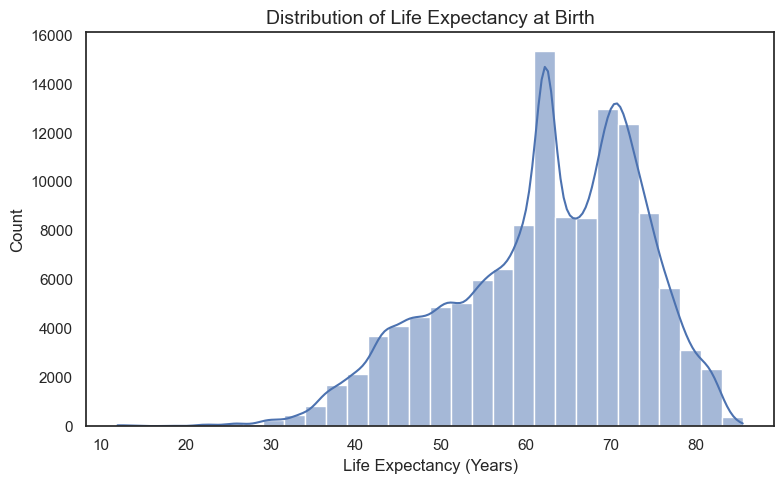

In [34]:
# checking the distribution of life expectancy at birth

plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='life_expectancy_at_birth',
    bins=30,
    kde=True,        
)

plt.title('Distribution of Life Expectancy at Birth', fontsize=14)
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

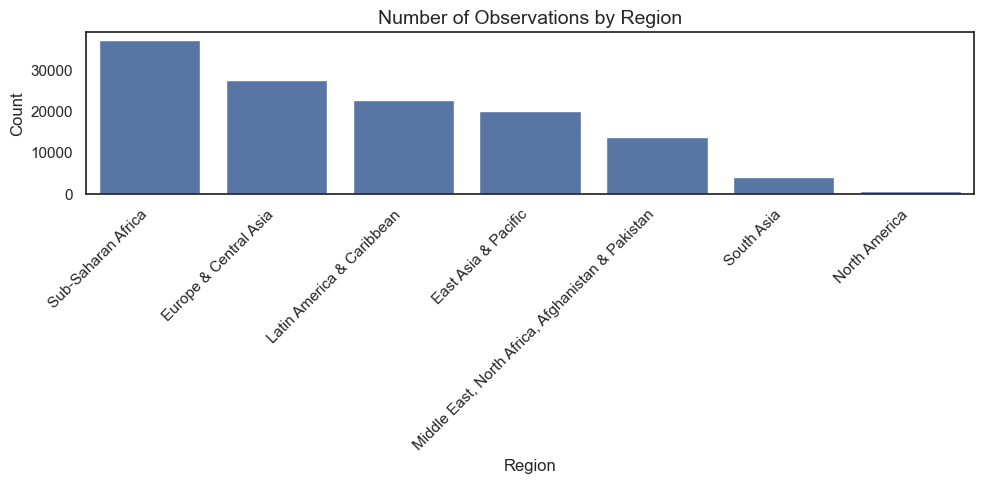

In [35]:
# Number of observations by Region

region_counts = df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=region_counts,
    x='Region',
    y='Count',
)

plt.title('Number of Observations by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

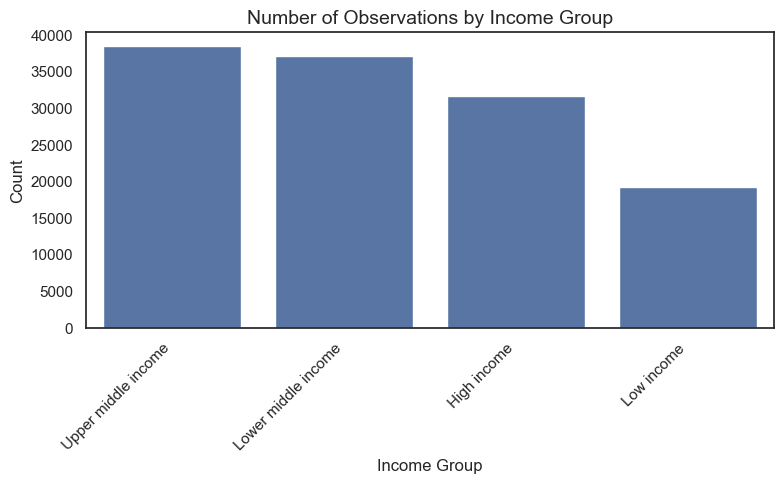

In [36]:
# Number of observations by Income group

# Preparing data
income_counts = df['Income group'].value_counts().reset_index()
income_counts.columns = ['Income group', 'Count']

plt.figure(figsize=(8,5))

sns.barplot(
    data=income_counts,
    x='Income group',
    y='Count',
)

plt.title('Number of Observations by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

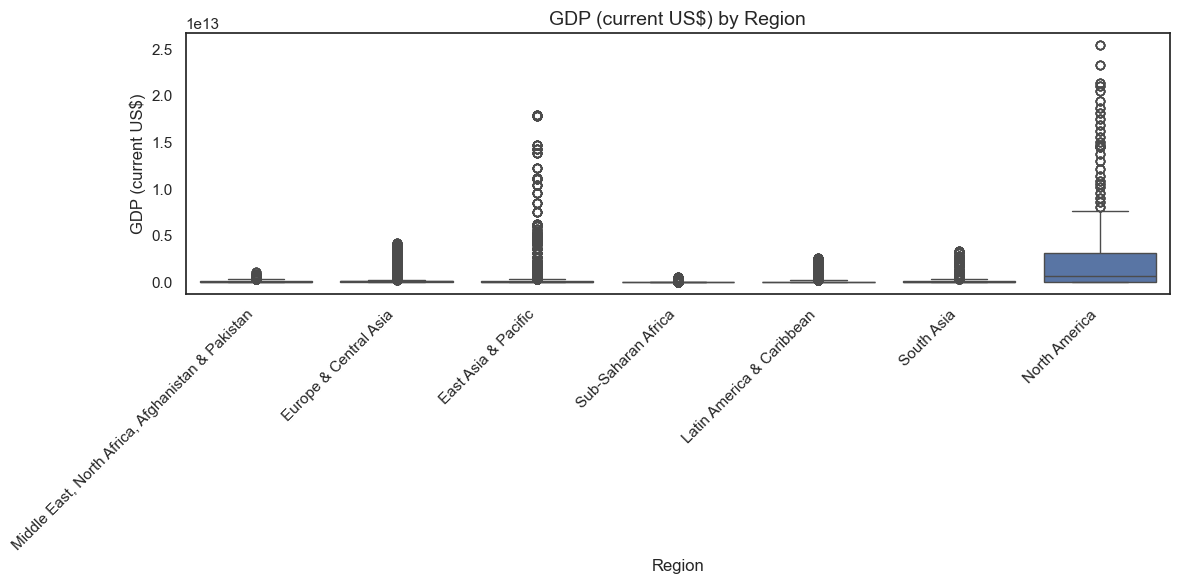

In [37]:
# Boxplot of GDP (current US$) by Region

plt.figure(figsize=(12,6)

)
sns.boxplot(
    data=df,
    x='Region',
    y='GDP_current_US',
)

plt.title('GDP (current US$) by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('GDP (current US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

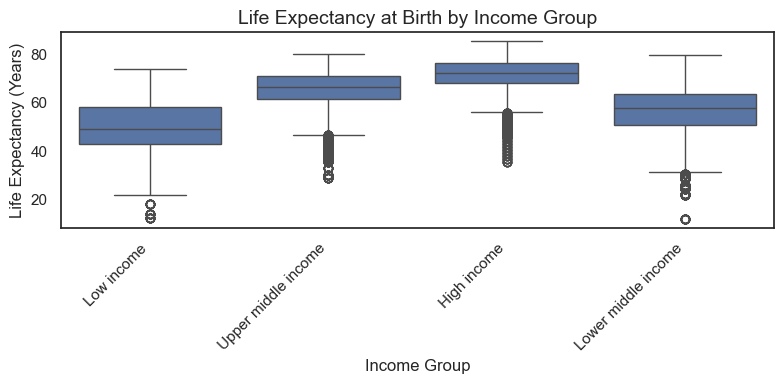

In [38]:
# Boxplot of life expectancy at birth by Income group

plt.figure(figsize=(8,4))
sns.boxplot(
    data=df,
    x='Income group',
    y='life_expectancy_at_birth',
)

plt.title('Life Expectancy at Birth by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

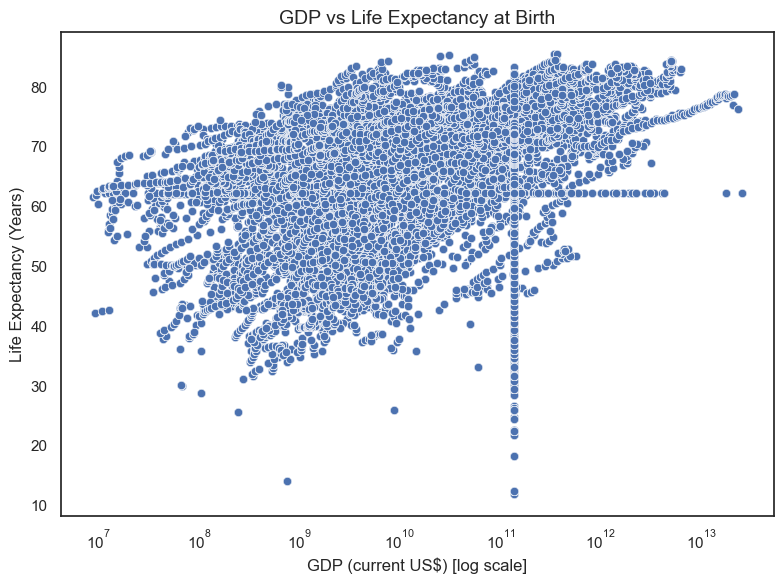

In [39]:
# Scatter plot of GDP (current US$) vs Life expectancy at birth

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='GDP_current_US',
    y='life_expectancy_at_birth',
    alpha=0.7
)

plt.xscale('log')  # Fixing skewness, makes plot readable
plt.title('GDP vs Life Expectancy at Birth', fontsize=14)
plt.xlabel('GDP (current US$) [log scale]')
plt.ylabel('Life Expectancy (Years)')
plt.tight_layout()
plt.show()

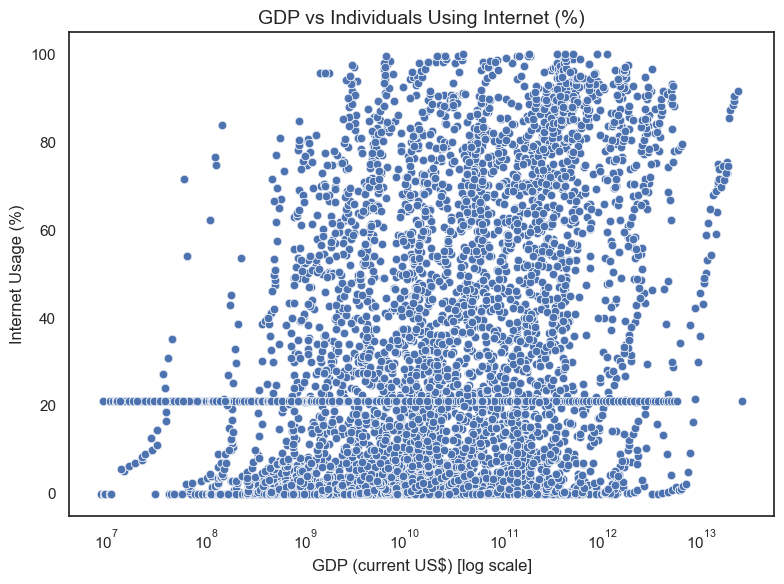

In [40]:
# Scatter plot of GDP (current US$) vs Individuals using internet %

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='GDP_current_US',
    y='individuals_using_internet%',
    alpha=0.7
)

plt.xscale('log')   # Fixing GDP skew and makes the plot readable
plt.title('GDP vs Individuals Using Internet (%)', fontsize=14)
plt.xlabel('GDP (current US$) [log scale]')
plt.ylabel('Internet Usage (%)')
plt.tight_layout()
plt.show()

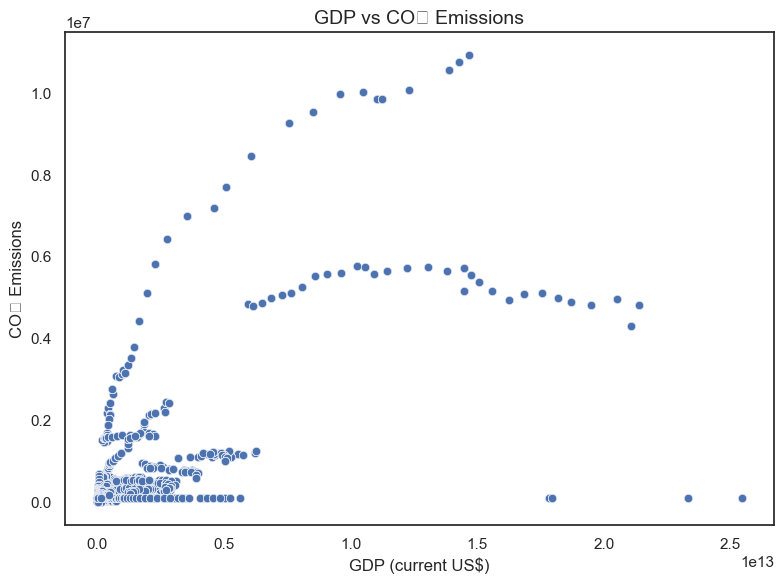

In [41]:
# Scatter plot of GDP (current US$) vs CO2 emissions

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='GDP_current_US',
    y='CO2_emisions',
    alpha=0.7
)

plt.title('GDP vs CO₂ Emissions', fontsize=14)
plt.xlabel('GDP (current US$)')
plt.ylabel('CO₂ Emissions')
plt.tight_layout()
plt.show()

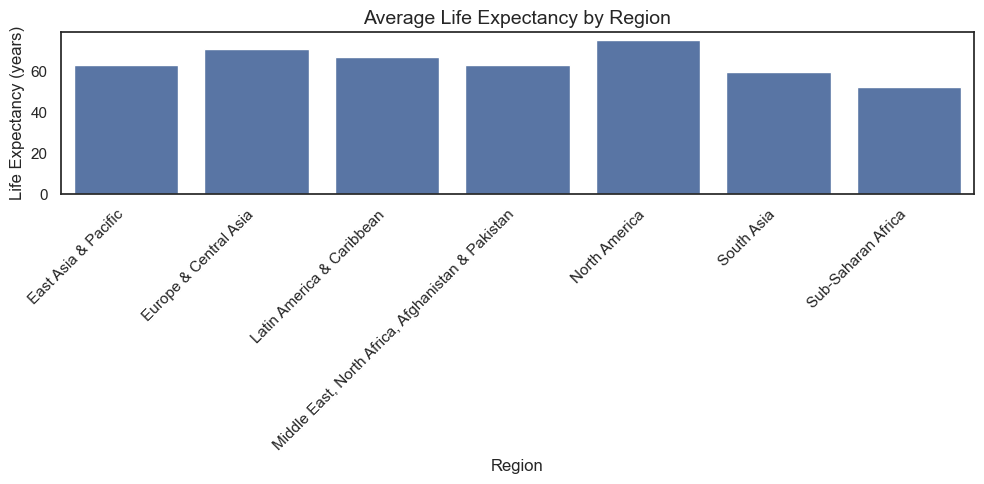

In [42]:
# life expectancy at birth by Region

life_by_region = df.groupby('Region')['life_expectancy_at_birth'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=life_by_region,
    x='Region',
    y='life_expectancy_at_birth'
)

plt.title('Average Life Expectancy by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

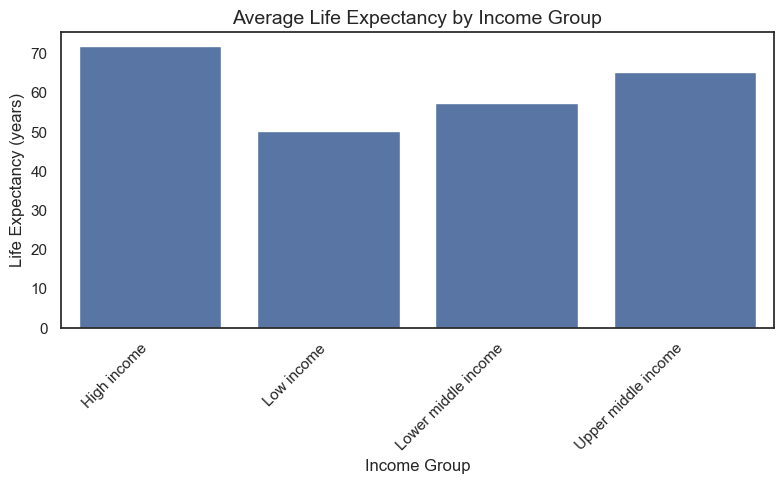

In [43]:
# life expectancy at birth by Income group

life_by_income = df.groupby('Income group')['life_expectancy_at_birth'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=life_by_income,
    x='Income group',
    y='life_expectancy_at_birth'
)

plt.title('Average Life Expectancy by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

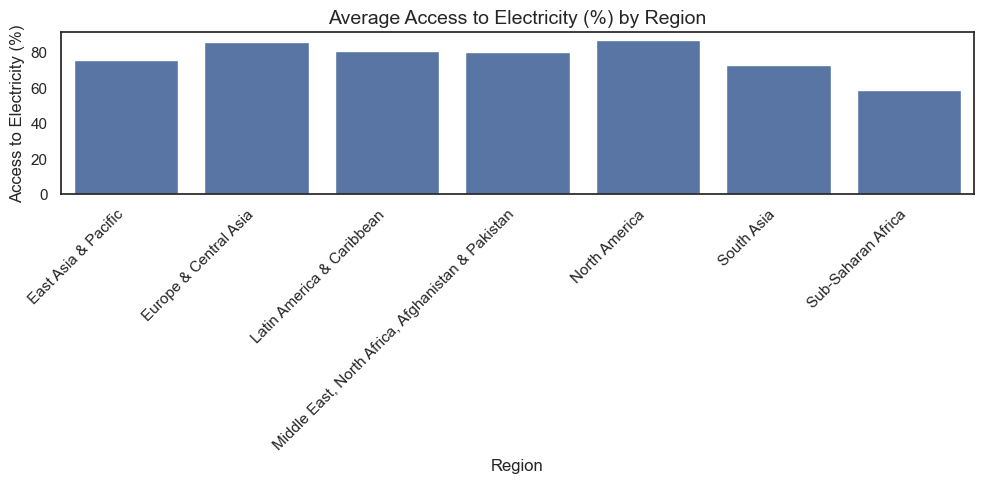

In [44]:
# Access to electricity by Region

elec_by_region = df.groupby('Region')['access_to_electricity%'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=elec_by_region,
    x='Region',
    y='access_to_electricity%'  
)

plt.title('Average Access to Electricity (%) by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Access to Electricity (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

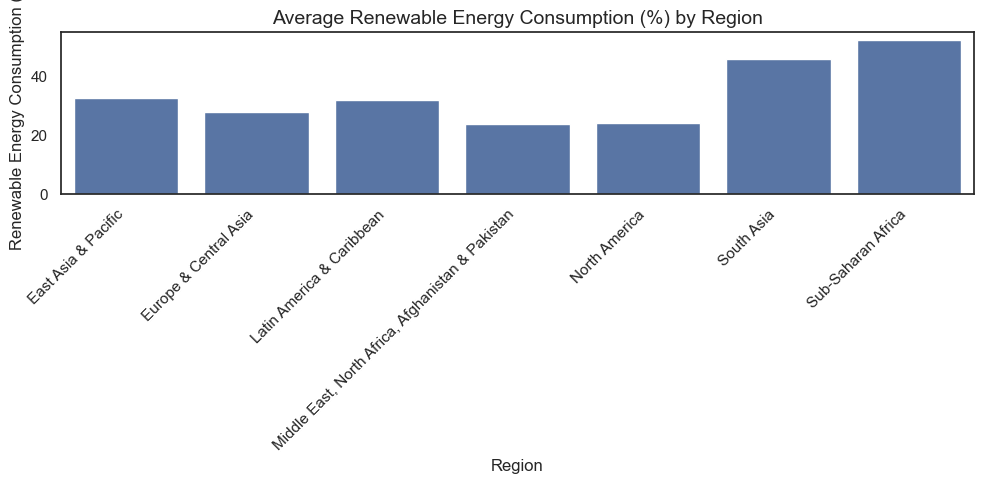

In [45]:
# Renewable energy consumption by Region

renew_by_region = df.groupby('Region')['renewvable_energy_consumption%'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=renew_by_region,
    x='Region',
    y='renewvable_energy_consumption%',
)

plt.title('Average Renewable Energy Consumption (%) by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Renewable Energy Consumption (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

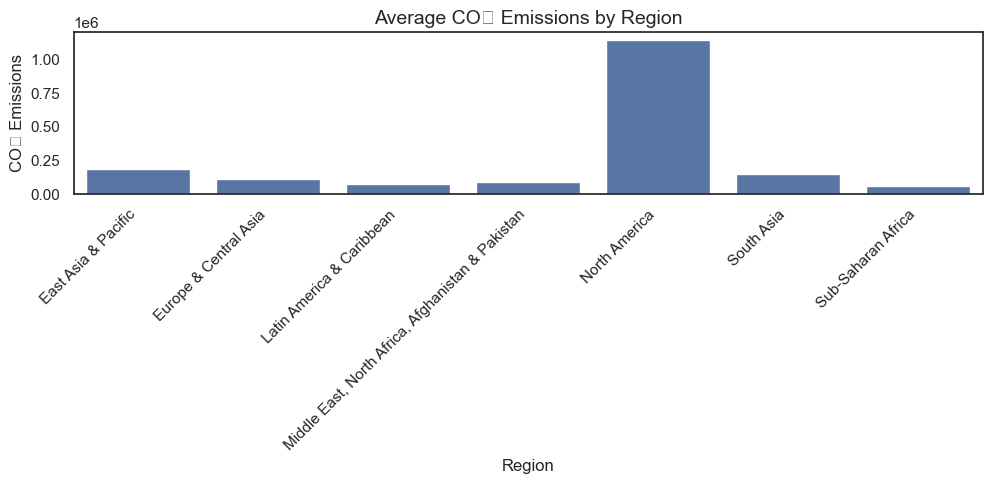

In [46]:
# CO2 emissions by Region

co2_by_region = df.groupby('Region')['CO2_emisions'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(
    data=co2_by_region,
    x='Region',
    y='CO2_emisions'
)

plt.title('Average CO₂ Emissions by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('CO₂ Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

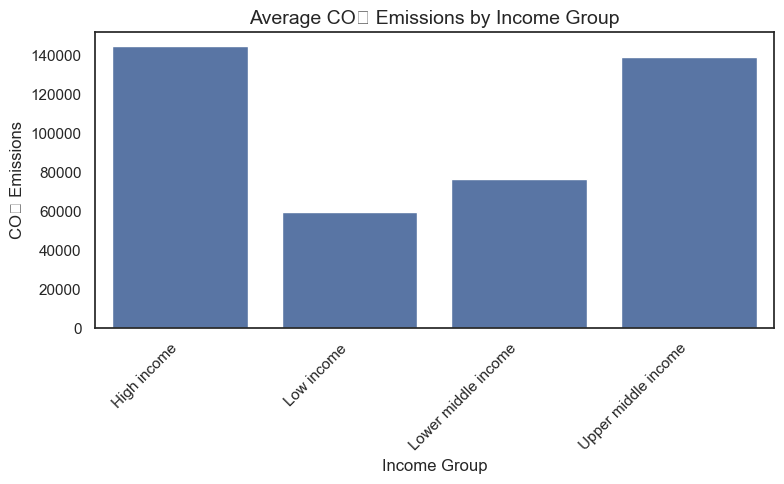

In [47]:
#  CO2 emissions by Income group

co2_by_income = df.groupby('Income group')['CO2_emisions'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=co2_by_income,
    x='Income group',
    y='CO2_emisions'
)

plt.title('Average CO₂ Emissions by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('CO₂ Emissions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

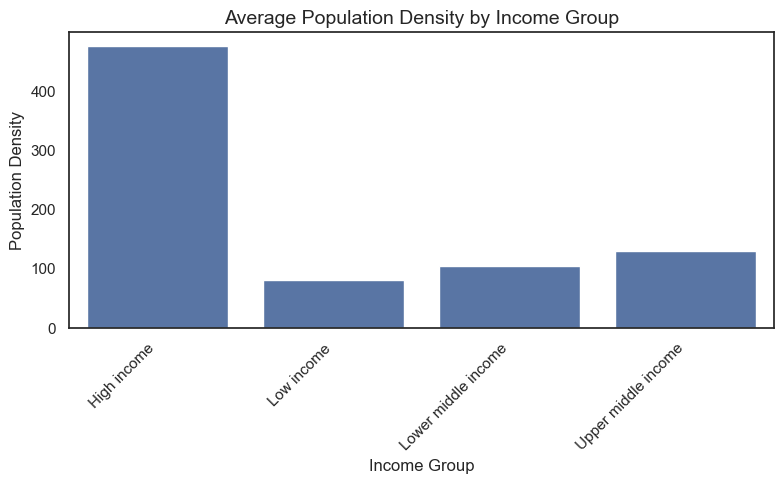

In [48]:
# Population density by Region

popdens_by_income = df.groupby('Income group')['population_density'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    data=popdens_by_income,
    x='Income group',
    y='population_density'
)

plt.title('Average Population Density by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Population Density')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

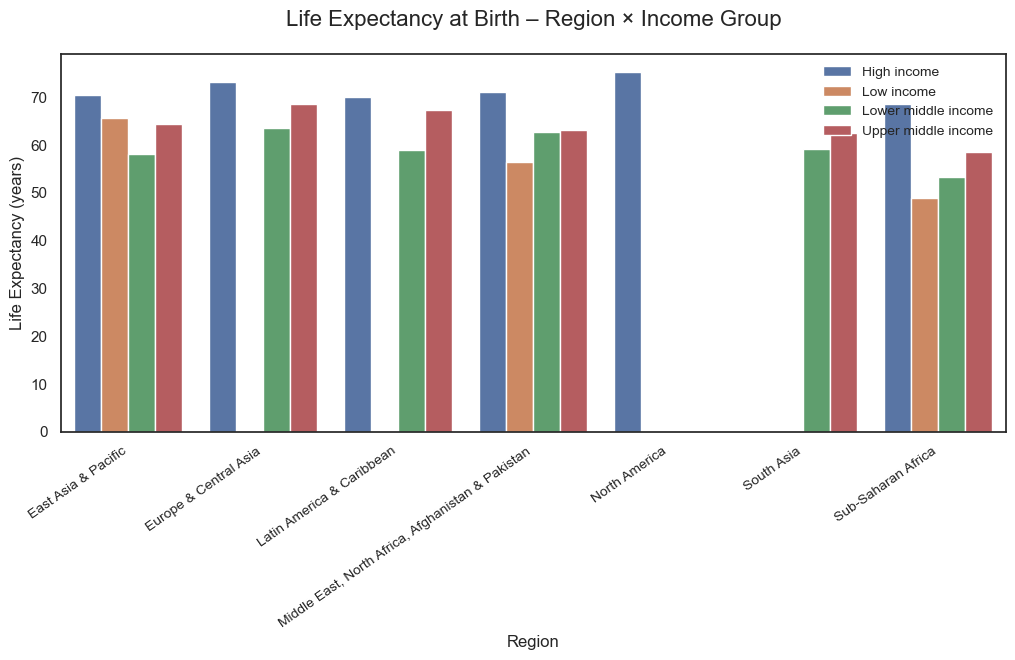

In [49]:
# Population density by Income group

df_group = df.groupby(['Region', 'Income group'])['life_expectancy_at_birth'].mean().reset_index()

plt.figure(figsize=(14,6))

sns.barplot(
    data=df_group,
    x='Region',
    y='life_expectancy_at_birth',
    hue='Income group',
)

plt.title('Life Expectancy at Birth – Region × Income Group', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=35, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.25, right=0.80)
plt.legend(
    
    loc='upper right',
    frameon=False,
    fontsize=10,
    title_fontsize=11
)

plt.show()

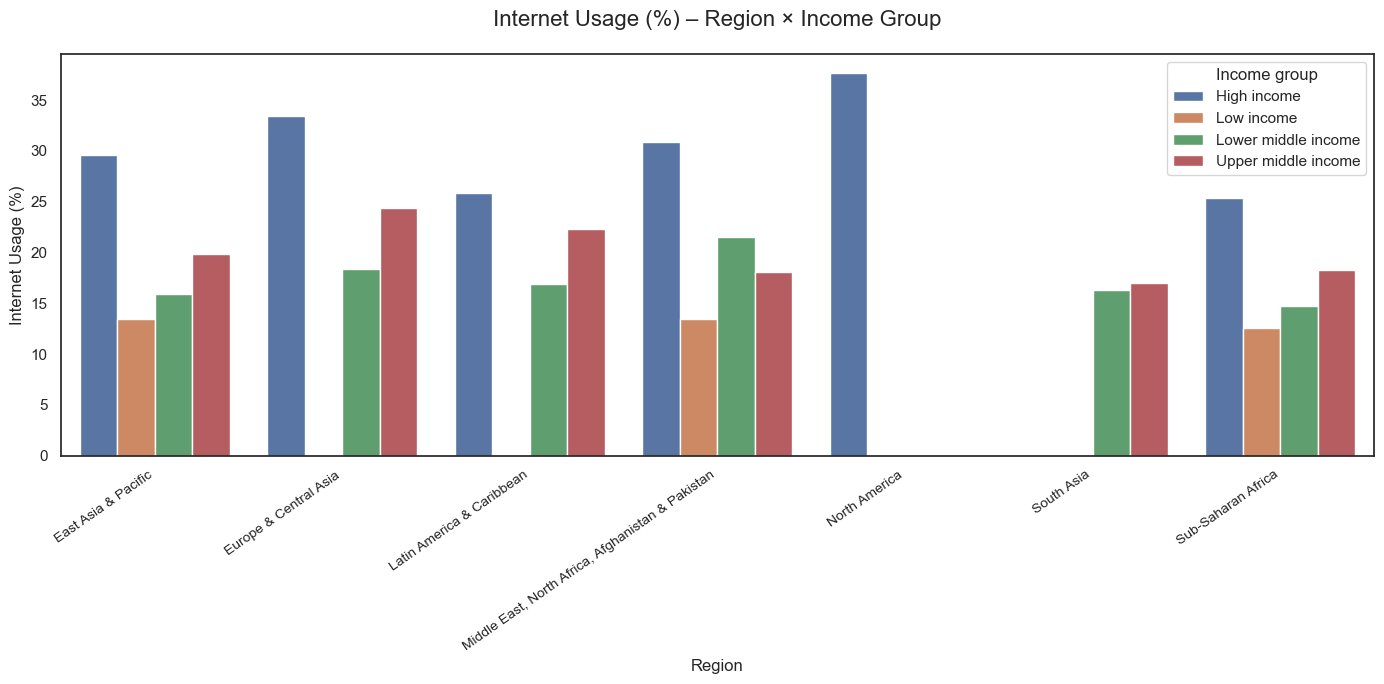

In [50]:
# Internet usage by Region and Income group 

df_group = df.groupby(['Region', 'Income group'])['individuals_using_internet%'].mean().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_group,
    x='Region',
    y='individuals_using_internet%',
    hue='Income group',
)

# Clean title with spacing
plt.title('Internet Usage (%) – Region × Income Group', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('Internet Usage (%)')

# Fix x-label overlap
plt.xticks(rotation=35, ha='right', fontsize=10)

# Avoid overlap between title, legend, and plot
plt.subplots_adjust(bottom=0.25, top=0.88)



plt.tight_layout()
plt.show()

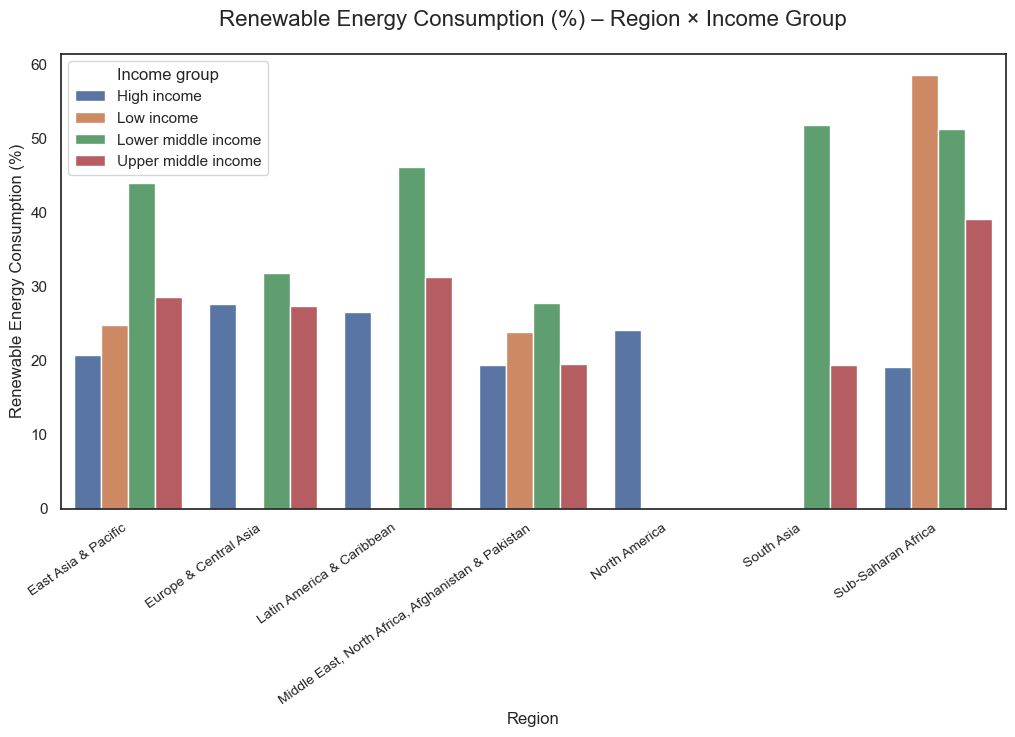

In [51]:
# Access to electricity by Region and Income group

df_group = df.groupby(['Region', 'Income group'])['renewvable_energy_consumption%'].mean().reset_index()

plt.figure(figsize=(14,7))

sns.barplot(
    data=df_group,
    x='Region',
    y='renewvable_energy_consumption%',
    hue='Income group',
)

# Title with spacing
plt.title('Renewable Energy Consumption (%) – Region × Income Group', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('Renewable Energy Consumption (%)')

# Fix x-axis label overlap
plt.xticks(rotation=35, ha='right', fontsize=10)

# Add proper margins
plt.subplots_adjust(bottom=0.25, right=0.80, top=0.90)



plt.show()

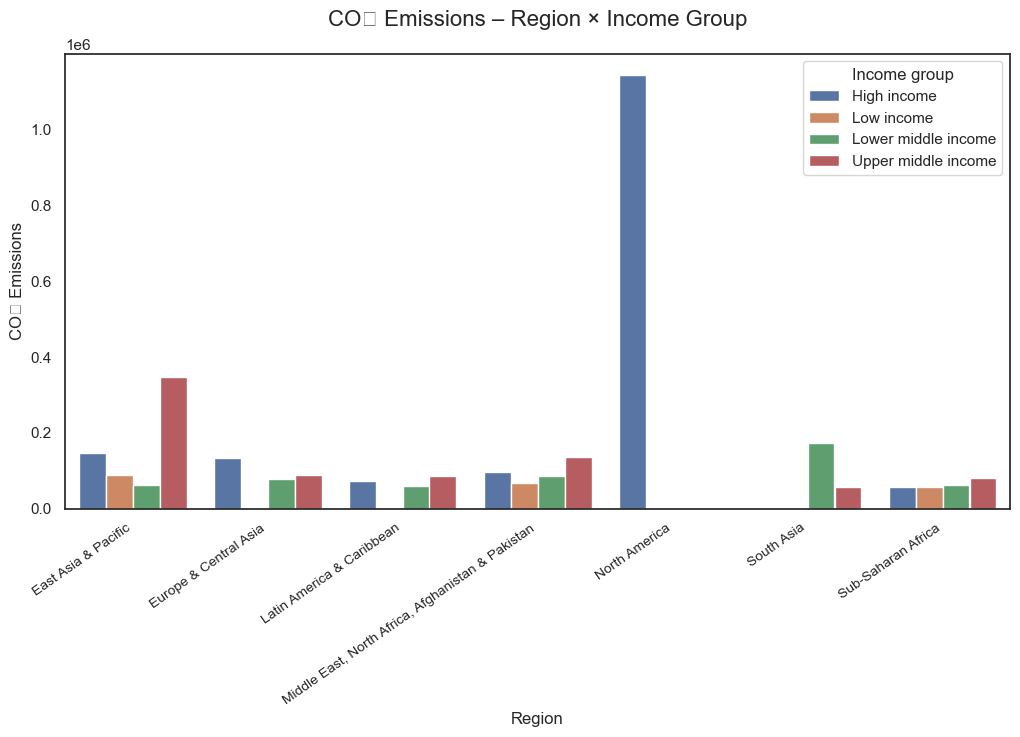

In [52]:
# CO2 emissions by Region and Income group
df_group = df.groupby(['Region', 'Income group'])['CO2_emisions'].mean().reset_index()

plt.figure(figsize=(14,7))

sns.barplot(
    data=df_group,
    x='Region',
    y='CO2_emisions',
    hue='Income group',
)

# Title + spacing
plt.title('CO₂ Emissions – Region × Income Group', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('CO₂ Emissions')

# Fix x-axis tick labels
plt.xticks(rotation=35, ha='right', fontsize=10)

# Add margins so nothing overlaps
plt.subplots_adjust(bottom=0.25, right=0.80, top=0.90)

plt.show()

# Answering the questions

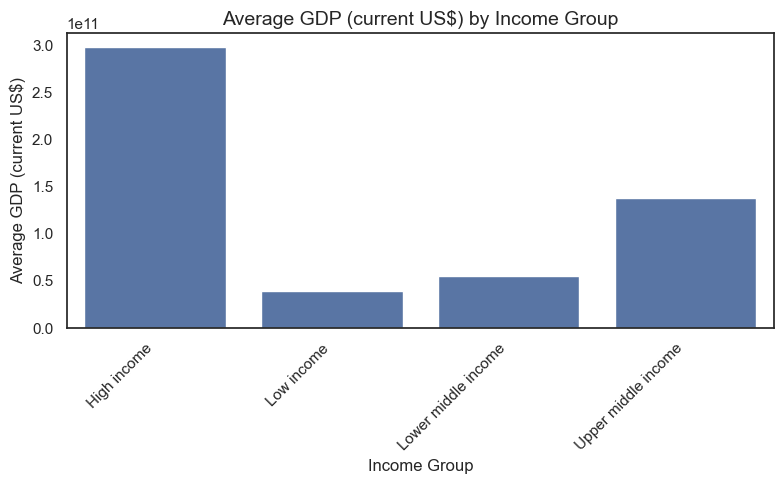

In [53]:
# Do different income groups differ in their GDP?

plt.figure(figsize=(8,5))

sns.barplot(
    x=df.groupby('Income group')['GDP_current_US'].mean().index,
    y=df.groupby('Income group')['GDP_current_US'].mean().values,
)

plt.title('Average GDP (current US$) by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Average GDP (current US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
# ANOVA test to see if there are significant differences in GDP among different income groups

groups = df.groupby('Income group')['GDP_current_US'].apply(list)

stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(776.3889140336589), pvalue=np.float64(0.0))

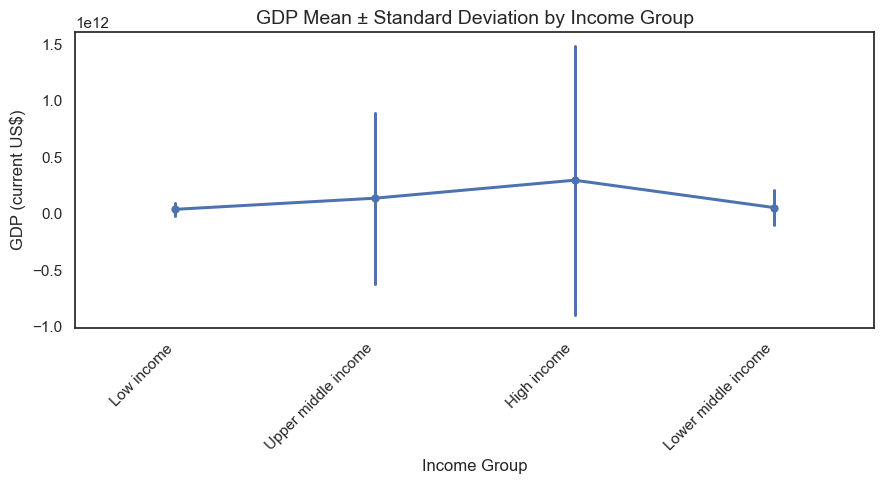

In [55]:
# Visualizing the differences in GDP among income groups with error bars

plt.figure(figsize=(9,5))

sns.pointplot(
    data=df,
    x='Income group',
    y='GDP_current_US',
    ci='sd',
    markers='o',
    linestyles='-', 
    scale=0.8
)

plt.title('GDP Mean ± Standard Deviation by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('GDP (current US$)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Low-income countries have the smallest GDP levels, followed by lower-middle and upper-middle groups.
High-income countries dominate with extremely high GDP values.
The ANOVA result (F = 776.39, p < 0.001) confirms that these visual differences are statistically significant.

In [56]:
# Do different income groups differ in their life expectancy?


df_life = df[['Income group', 'life_expectancy_at_birth']].dropna()

groups = [df_life[df_life['Income group'] == g]['life_expectancy_at_birth']
          for g in df_life['Income group'].unique()]

stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(33694.8561760401), pvalue=np.float64(0.0))

Life expectancy varies strongly across income groups.
Low-income countries have the lowest average life expectancy, reflecting limited healthcare access, higher infant mortality, weaker infrastructure, and greater disease burden.

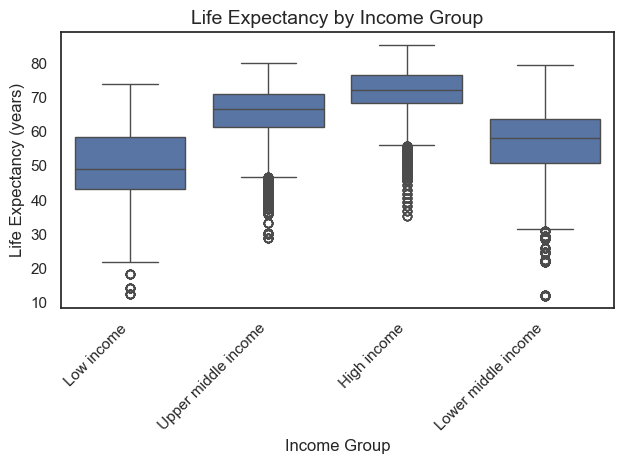

In [57]:
# Life Expectancy by Income Group

sns.boxplot(
    data=df,
    x='Income group',
    y='life_expectancy_at_birth',
)

plt.title('Life Expectancy by Income Group', fontsize=14)
plt.xlabel('Income Group')
plt.ylabel('Life Expectancy (years)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------------
        High income          Low income -21.6587   0.0 -21.8539 -21.4635   True
        High income Lower middle income -14.5025   0.0  -14.666 -14.3389   True
        High income Upper middle income  -6.4382   0.0  -6.6005   -6.276   True
         Low income Lower middle income   7.1563   0.0   6.9665    7.346   True
         Low income Upper middle income  15.2205   0.0  15.0318  15.4091   True
Lower middle income Upper middle income   8.0642   0.0   7.9085   8.2199   True
-------------------------------------------------------------------------------


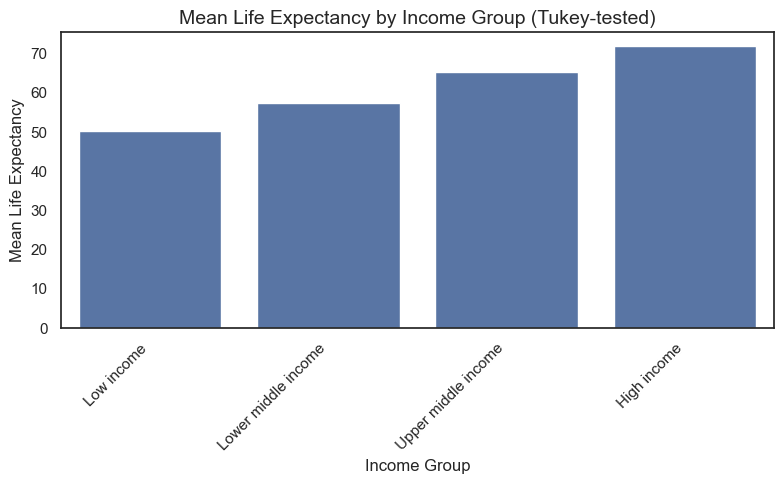

In [58]:
# Clean data
df_tukey = df[['Income group', 'life_expectancy_at_birth']].dropna()

# Tukey test
tukey = pairwise_tukeyhsd(
    endog=df_tukey['life_expectancy_at_birth'],
    groups=df_tukey['Income group'],
    alpha=0.05
)

print(tukey)

# Extract group means
group_means = df_tukey.groupby('Income group')['life_expectancy_at_birth'].mean().sort_values()


plt.figure(figsize=(8,5))
sns.barplot(
    x=group_means.index,
    y=group_means.values,
)

plt.ylabel('Mean Life Expectancy')
plt.title('Mean Life Expectancy by Income Group (Tukey-tested)', fontsize=14)
plt.xlabel('Income Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# Do different regions differ in their agricultural area?

df_agri = df[['Region', 'agricultural_land%']].dropna()

groups = [
    df_agri[df_agri['Region'] == r]['agricultural_land%']
    for r in df_agri['Region'].unique()
]

stats.f_oneway(*groups)

F_onewayResult(statistic=np.float64(2057.256237843964), pvalue=np.float64(0.0))

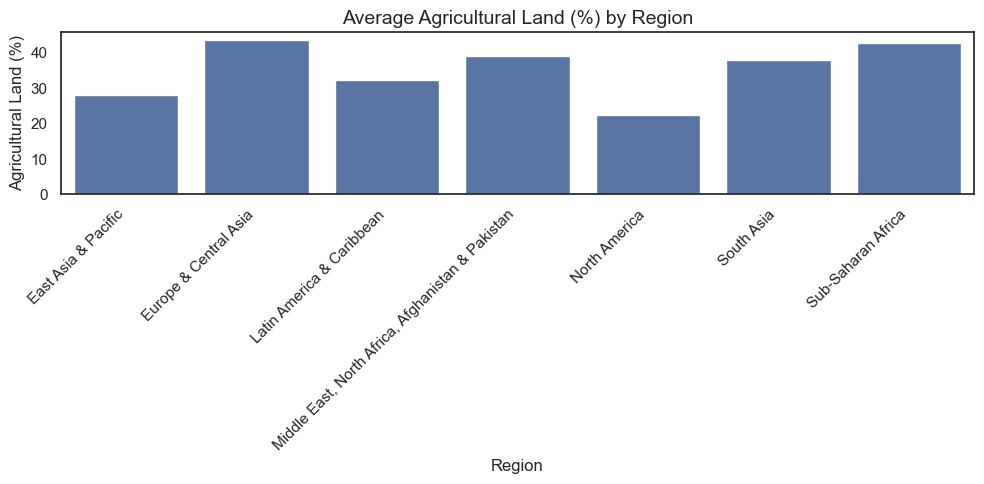

In [60]:
# Average Agricultural Land (%) by Region

plt.figure(figsize=(10,5))

sns.barplot(
    x=df.groupby('Region')['agricultural_land%'].mean().index,
    y=df.groupby('Region')['agricultural_land%'].mean().values,
)

plt.title('Average Agricultural Land (%) by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Agricultural Land (%)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Barplot results show clear regional patterns: some regions (e.g., Sub-Saharan Africa, South Asia) have substantially higher agricultural land percentages, while others (e.g., Europe & Central Asia, Middle East & North Africa) exhibit lower levels.

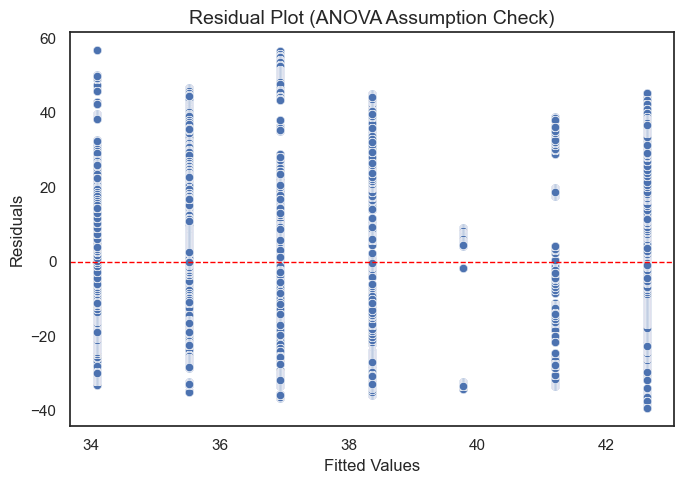

In [61]:
# Prepare data
df_agri = df[['Region', 'agricultural_land%']].dropna()
df_agri['Region_code'] = df_agri['Region'].astype('category').cat.codes

# Fit the model
model = sm.OLS(df_agri['agricultural_land%'], sm.add_constant(df_agri['Region_code'])).fit()


plt.figure(figsize=(7,5))

sns.scatterplot(
    x=model.fittedvalues,
    y=model.resid,
    alpha=0.7
)

# Horizontal zero line
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (ANOVA Assumption Check)', fontsize=14)

plt.tight_layout()
plt.show()

The residual plot suggests the ANOVA assumptions were reasonably met, meaning the test results are reliable.
The residuals are spread randomly around the zero line with no visible pattern or trend, which indicates that the model errors are independent and centered. Although the spread varies slightly between regions, it is not severe enough to violate the homogeneity of variance assumption. Therefore, the ANOVA outcome can be trusted as a valid indication that regional differences in agricultural area truly exist.

In [62]:
vacation_countries = ['Thailand', 'Spain', 'Italy', 'Maldives', 'Mexico']
df_vac = df[df['country'].isin(vacation_countries)].dropna(subset=['avg_precipitation'])

In [63]:
groups = [
    df_vac[df_vac['country'] == c]['avg_precipitation']
    for c in vacation_countries
]

anova_result = stats.f_oneway(*groups)
anova_result

F_onewayResult(statistic=np.float64(10760.252867999301), pvalue=np.float64(0.0))

The ANOVA test shows a statistically significant difference in average precipitation among my favorite vacation countries (p < 0.05). This indicates that these destinations experience different levels of rainfall, which is expected given their diverse climate zones.

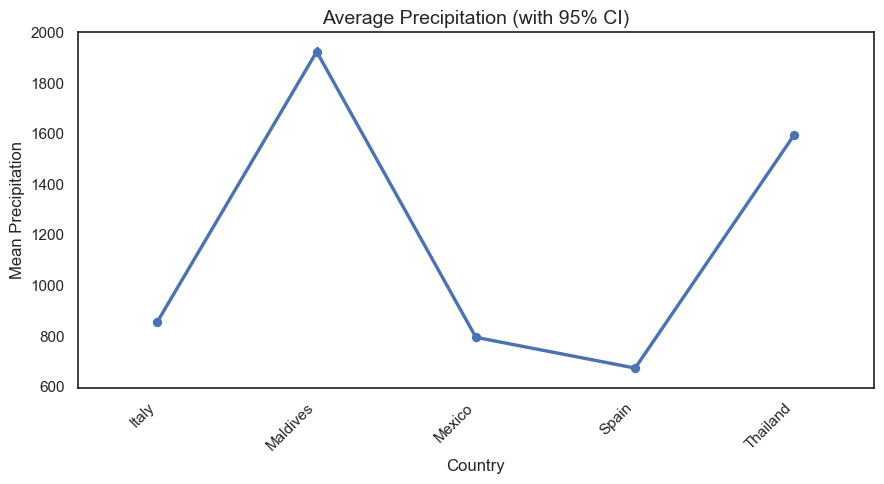

In [64]:
# Average Precipitation (with 95% CI)

plt.figure(figsize=(9,5))

sns.pointplot(
    data=df_vac,
    x='country',
    y='avg_precipitation',
    ci=95,
    markers='o',
    linestyles='-',
    scale=0.9
)

plt.title('Average Precipitation (with 95% CI)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Mean Precipitation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The point plot shows clear differences in average precipitation across the selected vacation countries.
Maldives has the highest rainfall, followed by Thailand, reflecting their tropical climates. Italy and Mexico show moderate precipitation levels, while Spain has the lowest rainfall.

### Governance and institutional quality
Governance and institutional quality (e.g., government effectiveness, control of corruption, rule of law)

In [65]:
gov_cols = [
    'goverment_effectiveness_estimate',
    'control_of_corruption_estimate',
    'rule_of_law_estimate',
    'political_stability_estimate',
    'voice_and_accountability_estimate',
    'regulatory_quality_estimate'
]

df[gov_cols].describe()

,goverment_effectiveness_estimate,control_of_corruption_estimate,rule_of_law_estimate,political_stability_estimate,voice_and_accountability_estimate,regulatory_quality_estimate
count,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000
mean,-0.242250,-0.224462,-0.220850,-0.160550,-0.152500,-0.230907
std,0.542108,0.544197,0.552618,0.586637,0.574955,0.543631
min,-2.439963,-1.936706,-2.333315,-3.180352,-2.313395,-2.526690
25%,-0.242250,-0.224462,-0.220850,-0.160550,-0.152500,-0.230907
50%,-0.242250,-0.224462,-0.220850,-0.160550,-0.152500,-0.230907
75%,-0.242250,-0.224462,-0.220850,-0.160550,-0.152500,-0.230907
max,2.469660,2.459118,2.124782,1.964211,1.800992,2.252235


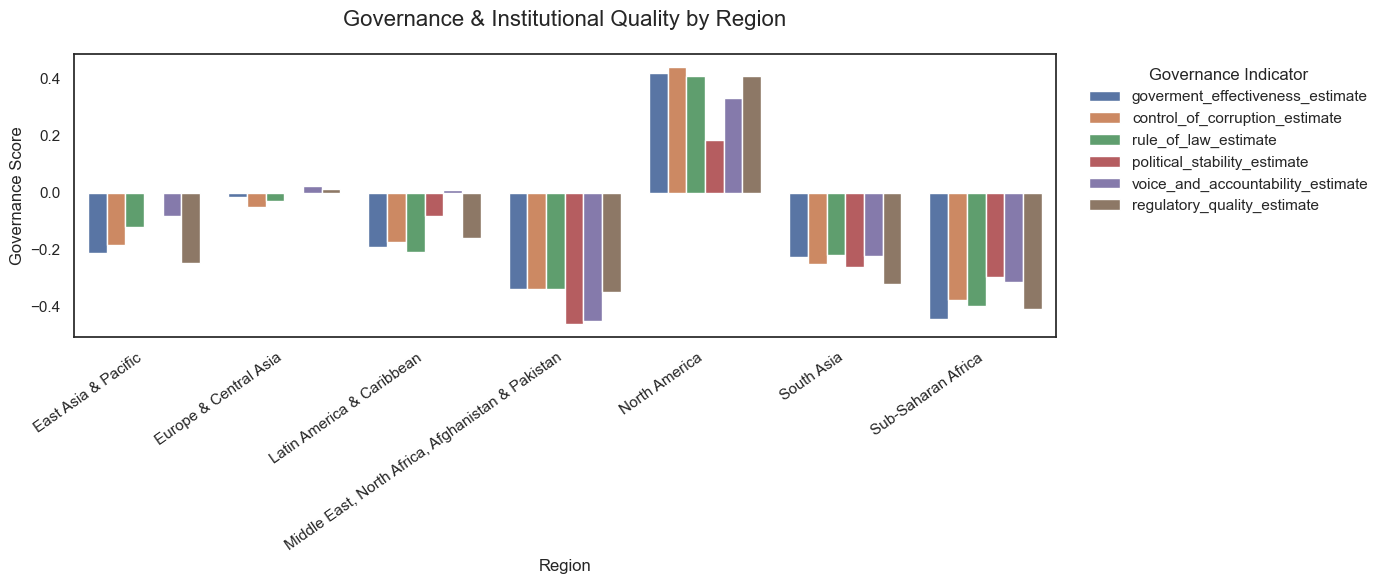

In [66]:
# Governance & Institutional Quality by Region

df_gov = df.groupby('Region')[gov_cols].mean().reset_index().melt(id_vars='Region')

plt.figure(figsize=(14,6))

sns.barplot(
    data=df_gov,
    x='Region',
    y='value',
    hue='variable',
)

plt.title('Governance & Institutional Quality by Region', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('Governance Score')
plt.xticks(rotation=35, ha='right')

# Legend on right so it doesn't overlap
plt.legend(
    title='Governance Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25, top=0.90)
plt.tight_layout()
plt.show()

Europe & Central Asia show the strongest governance across all indicators.
Sub-Saharan Africa and South Asia score lowest, reflecting weaker institutions and higher instability.
Latin America and MENA show mixed performance.

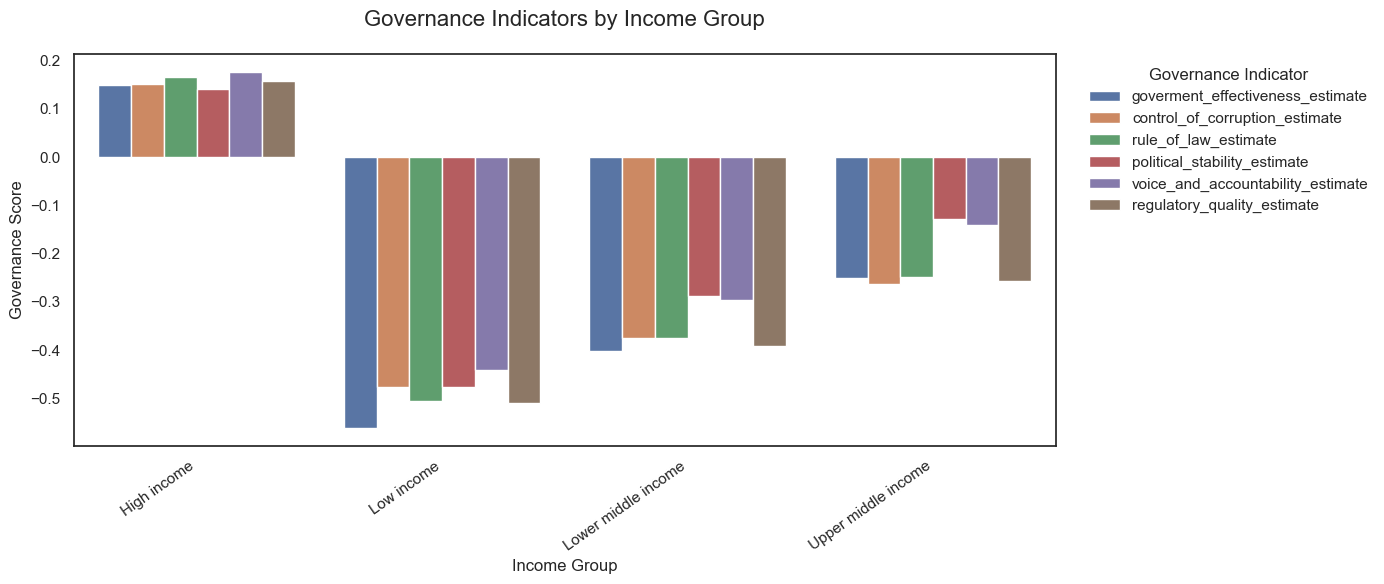

In [67]:
# Average Governance Scores by Income Group

df_gov_inc = df.groupby('Income group')[gov_cols].mean().reset_index().melt(id_vars='Income group')

plt.figure(figsize=(14,6))
sns.barplot(
    data=df_gov_inc,
    x='Income group',
    y='value',
    hue='variable',
)

plt.title('Governance Indicators by Income Group', fontsize=16, pad=20)
plt.xlabel('Income Group')
plt.ylabel('Governance Score')
plt.xticks(rotation=35, ha='right')

plt.legend(
    title='Governance Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25, top=0.90)
plt.tight_layout()
plt.show()

High-income countries have the strongest governance.
As income decreases, governance scores fall sharply.
Low-income countries have the weakest institutions and lowest political stability.

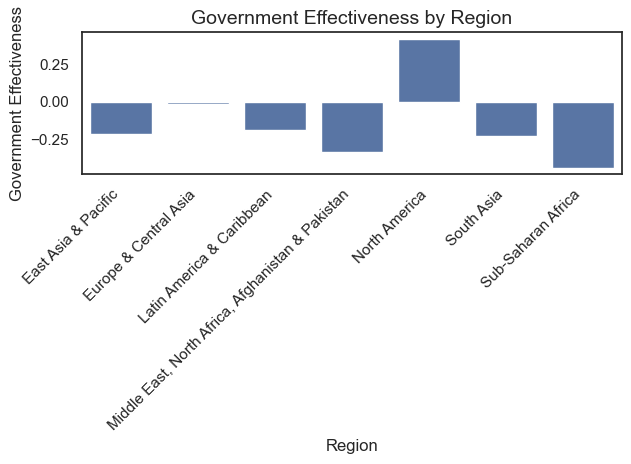

In [68]:
# Government Effectiveness by Region

sns.barplot(
    x=df.groupby('Region')['goverment_effectiveness_estimate'].mean().index,
    y=df.groupby('Region')['goverment_effectiveness_estimate'].mean().values,
)

plt.title('Government Effectiveness by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Government Effectiveness')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

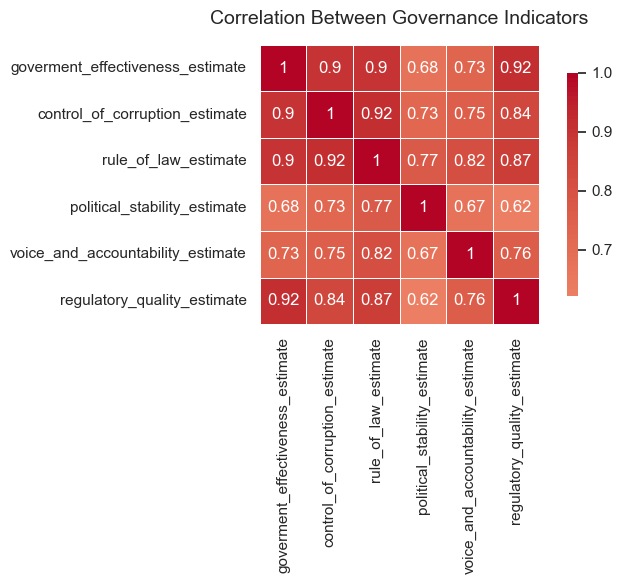

In [69]:
# Correlation heatmap of governance indicators

plt.figure(figsize=(8,6))

sns.heatmap(
    df[gov_cols].corr(),
    annot=True,
    cmap='coolwarm',     
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title('Correlation Between Governance Indicators', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Governance indicators are strongly correlated.
Countries with good corruption control also tend to have strong rule of law, high government effectiveness, and stable politics.

<br><br><br>

Governance and institutional quality represent a crucial sustainability dimension because strong institutions enable long-term economic, environmental, and social progress.

In the dataset, governance indicators vary significantly across regions and income groups. Europe & Central Asia and high-income countries show consistently strong governance performance, while Sub-Saharan Africa and low-income countries score the lowest across effectiveness, corruption control, and rule of law.

The strong correlations between governance indicators show that institutional strength is multidimensional: countries with less corruption also tend to be more effective, more accountable, and more stable.

These results highlight that good governance is a foundational requirement for sustainable development—countries with stronger institutions achieve better development outcomes across all sustainability dimensions.

## Environmental sustainability 

In [70]:
env_cols = ['CO2_emisions', 'other_greenhouse_emisions',
            'renewvable_energy_consumption%', 'forest_land%',
            'agricultural_land%', 'avg_precipitation']

df[env_cols].describe()

,CO2_emisions,other_greenhouse_emisions,renewvable_energy_consumption%,forest_land%,agricultural_land%,avg_precipitation
count,1.266460e+05,1.266460e+05,126646.000000,126646.000000,126646.000000,126646.000000
mean,1.100406e+05,1.595730e+05,36.637326,33.048420,38.162170,1229.871653
std,4.048617e+05,4.983883e+05,21.902128,17.512479,20.279020,716.004262
min,0.000000e+00,1.262229e+01,0.000000,0.000000,0.262821,18.100000
25%,7.765400e+03,2.690538e+04,31.530000,32.541477,21.980091,667.000000
50%,1.100406e+05,1.595730e+05,36.637326,33.048420,38.162170,1229.871653
75%,1.100406e+05,1.595730e+05,36.637326,33.048420,51.976285,1583.000000
max,1.094469e+07,1.294287e+07,98.340000,98.574551,93.440750,3240.000000


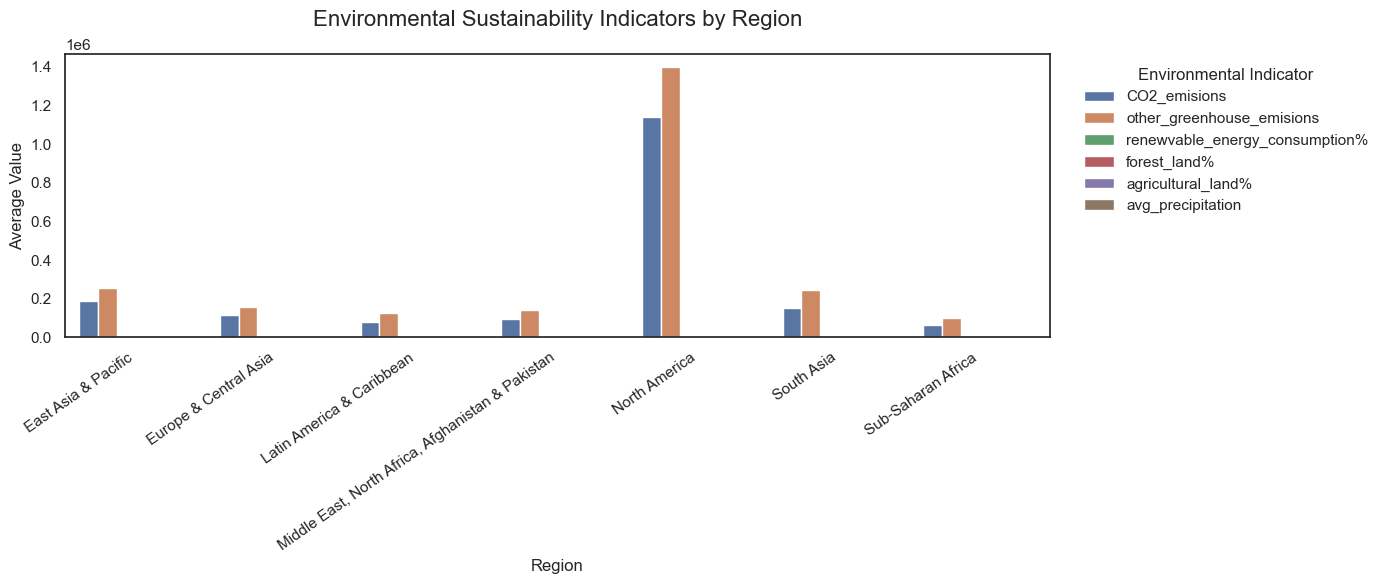

In [71]:
# Environmental Sustainability Indicators by Region

df_env = df.groupby('Region')[env_cols].mean().reset_index().melt(id_vars='Region')

plt.figure(figsize=(14,6))

sns.barplot(
    data=df_env,
    x='Region',
    y='value',
    hue='variable',
)

plt.title('Environmental Sustainability Indicators by Region', fontsize=16, pad=20)
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')

plt.legend(
    title='Environmental Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25, top=0.90)
plt.tight_layout()
plt.show()

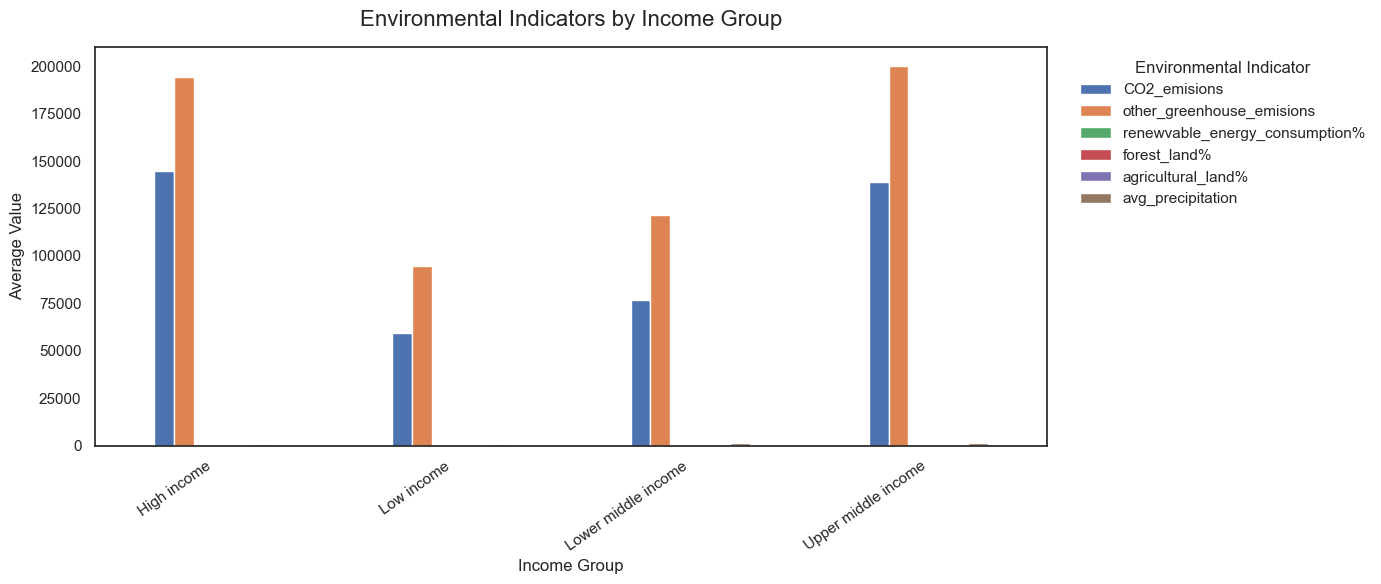

In [72]:
# Environmental Indicators by Income Group

df.groupby('Income group')[env_cols].mean().plot(
    kind='bar',
    figsize=(14,6),
)

plt.title('Environmental Indicators by Income Group', fontsize=16, pad=15)
plt.xlabel('Income Group')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')

# Clean legend
plt.legend(
    title='Environmental Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)
plt.tight_layout()
plt.show()

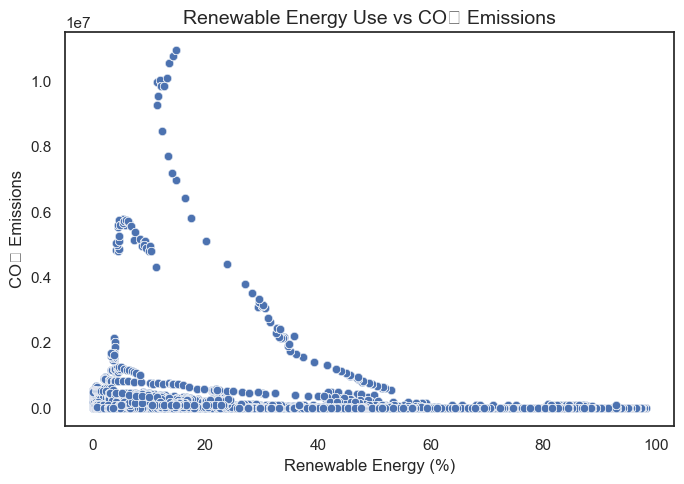

In [73]:
# Renewable Energy Use vs CO₂ Emissions

plt.figure(figsize=(7,5))

sns.scatterplot(
    x=df['renewvable_energy_consumption%'],
    y=df['CO2_emisions'],
    alpha=0.7
)

plt.title('Renewable Energy Use vs CO₂ Emissions', fontsize=14)
plt.xlabel('Renewable Energy (%)')
plt.ylabel('CO₂ Emissions')
plt.tight_layout()
plt.show()

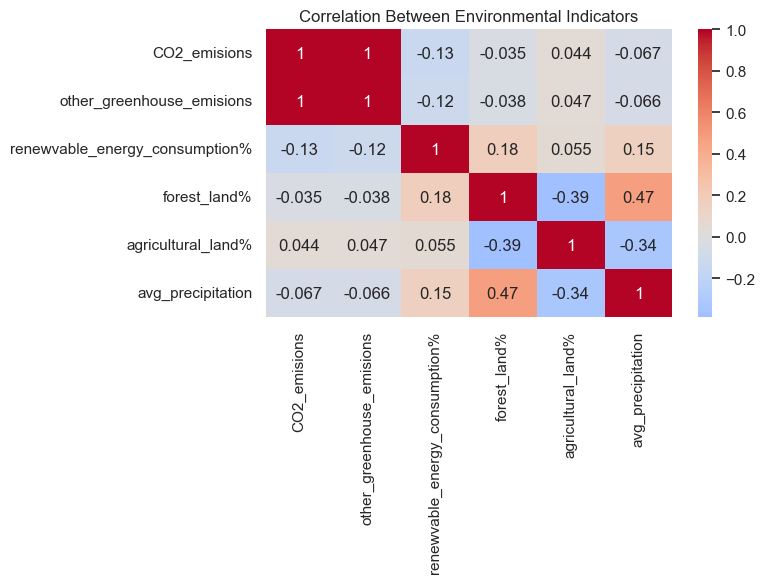

In [74]:
# Correlation Between Environmental Indicators

plt.figure(figsize=(8,6))
sns.heatmap(df[env_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Environmental Indicators')
plt.tight_layout()
plt.show()

Environmental sustainability varies widely between countries and regions. Europe & Central Asia performs strongest with high renewable energy consumption and lower emissions, while Middle East & North Africa shows high CO₂ emissions and low renewable energy use. Upper-middle income countries emit the most CO₂ due to rapid industrialization, whereas low-income countries emit very little but also have weak renewable energy capacity.

Renewable energy use is negatively related to CO₂ emissions, confirming that cleaner energy supports environmental sustainability. Forest land plays an important role in ecological health, with Latin America and some low-income regions showing high forest coverage. Overall, the data shows a significant global imbalance, where some regions are environmentally sustainable while others face major challenges.

## Economic performance and poverty reduction

In [75]:
eco_cols = ['GDP_current_US', 'inflation_annual%', 'tax_revenue%', 
            'real_interest_rate', 'expense%', 'population_density']

# summary statistics
df[eco_cols].describe()

,GDP_current_US,inflation_annual%,tax_revenue%,real_interest_rate,expense%,population_density
count,1.266460e+05,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000
mean,1.386527e+11,26.525586,16.719974,5.546619,26.082230,201.896494
std,7.399455e+11,304.049936,4.445877,9.736173,6.825047,984.183396
min,8.824744e+06,-17.640424,0.042056,-97.693477,2.806068,0.098625
25%,2.028295e+09,3.736639,16.719974,5.546619,26.082230,22.031479
50%,1.531458e+10,11.634763,16.719974,5.546619,26.082230,72.685173
75%,1.386527e+11,26.525586,16.719974,5.546619,26.082230,201.896494
max,2.543970e+13,23773.131774,147.640196,628.319666,210.205132,21594.800000


<Figure size 1400x600 with 0 Axes>

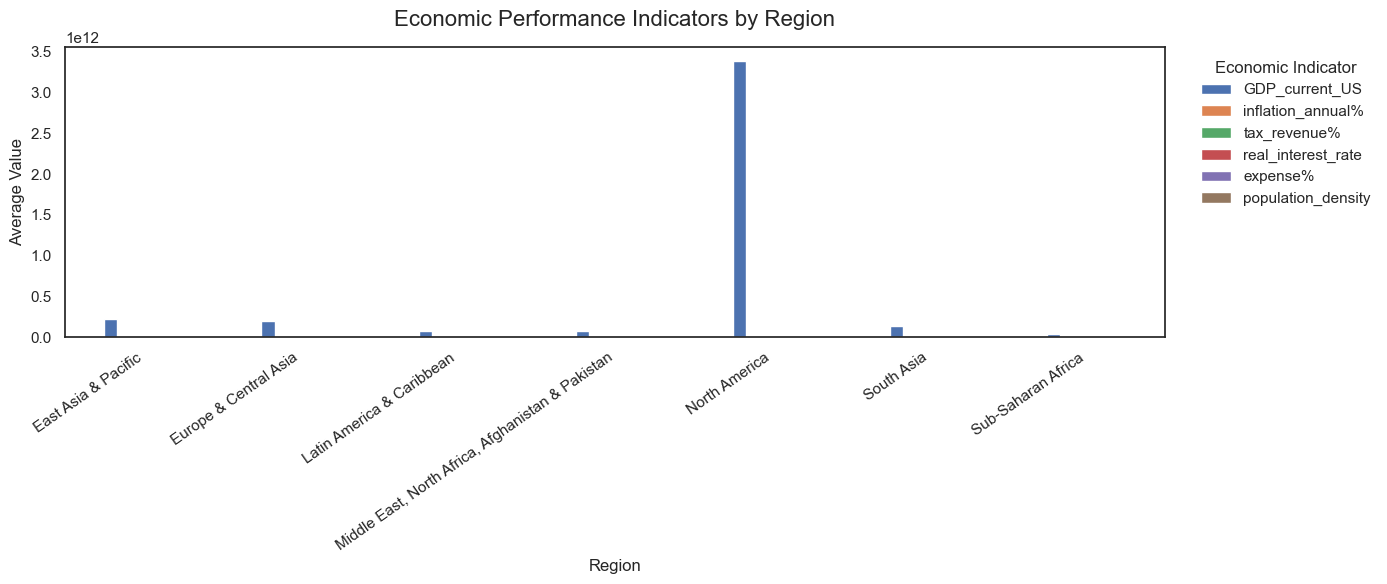

In [76]:
# Economic Performance Indicators by Region'


plt.figure(figsize=(14,6))

df.groupby('Region')[eco_cols].mean().plot(
    kind='bar',
    figsize=(14,6),
)

plt.title('Economic Performance Indicators by Region', fontsize=16, pad=15)
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')

plt.legend(
    title='Economic Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

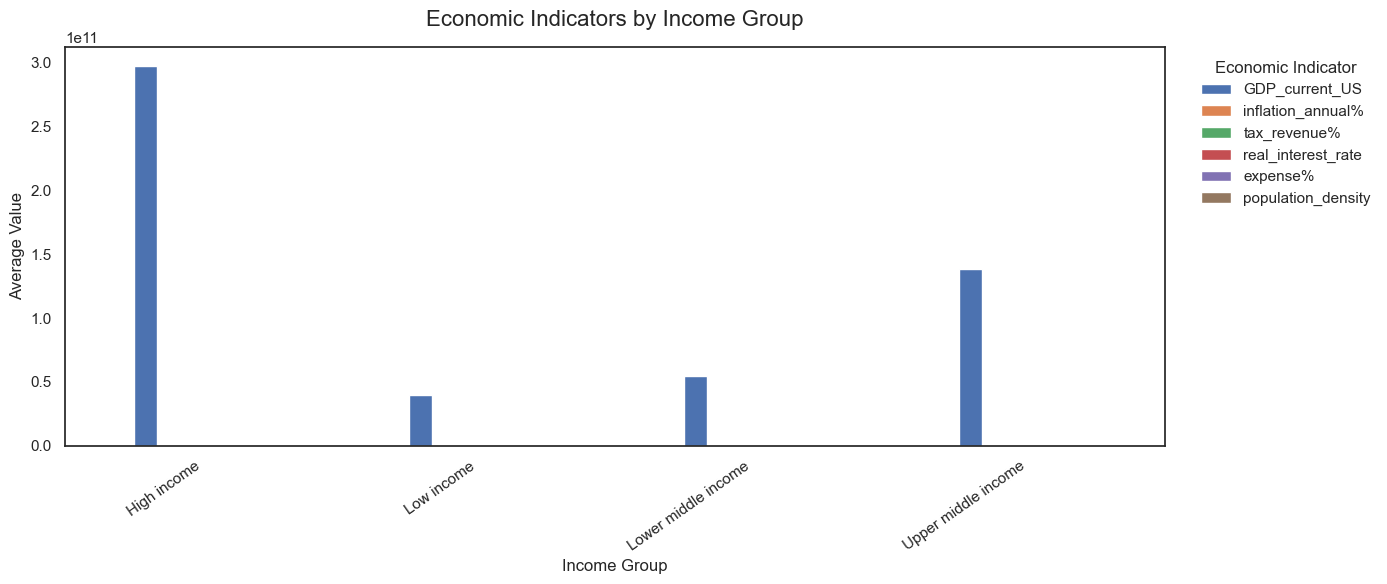

In [77]:
# Economic Indicators by Income Group

plt.figure(figsize=(14,6))

df.groupby('Income group')[eco_cols].mean().plot(
    kind='bar',
    figsize=(14,6),
)

plt.title('Economic Indicators by Income Group', fontsize=16, pad=15)
plt.xlabel('Income Group')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')


plt.legend(
    title='Economic Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

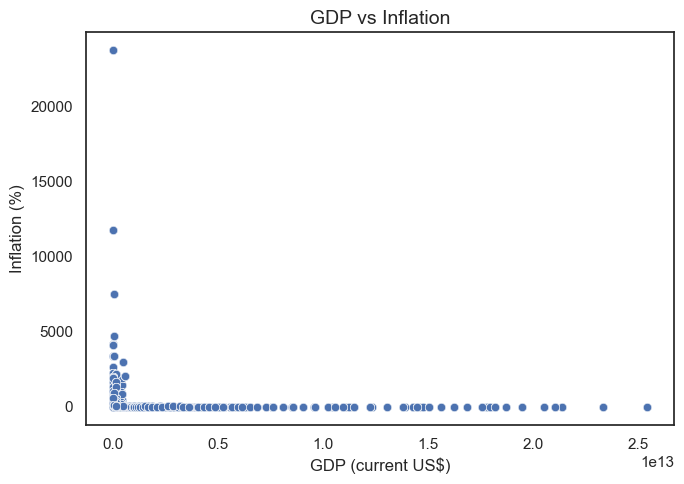

In [78]:
#  GDP vs Inflation


plt.figure(figsize=(7,5))

sns.scatterplot(
    x=df['GDP_current_US'],
    y=df['inflation_annual%'],
    alpha=0.7
)

plt.title('GDP vs Inflation', fontsize=14)
plt.xlabel('GDP (current US$)')
plt.ylabel('Inflation (%)')

plt.tight_layout()
plt.show()

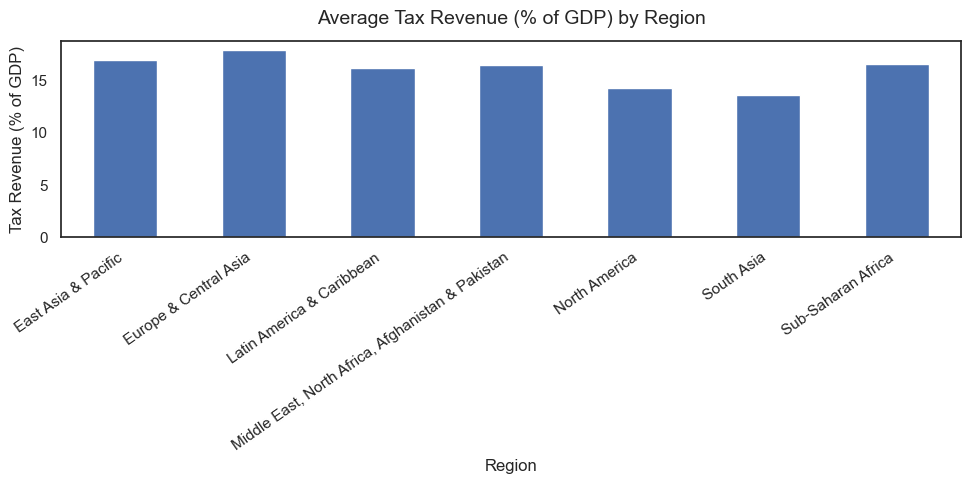

In [79]:
# Average Tax Revenue (% of GDP) by Region

plt.figure(figsize=(10,5))

df.groupby('Region')['tax_revenue%'].mean().plot(
    kind='bar',
    figsize=(10,5),

)

plt.title('Average Tax Revenue (% of GDP) by Region', fontsize=14, pad=12)
plt.xlabel('Region')
plt.ylabel('Tax Revenue (% of GDP)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

### Human well-being and health

In [80]:
well_cols = [
    'life_expectancy_at_birth',
    'government_health_expenditure%',
    'government_expenditure_on_education%',
    'access_to_electricity%',
    'individuals_using_internet%',
    'population_density'
]

df[well_cols].describe()

,life_expectancy_at_birth,government_health_expenditure%,government_expenditure_on_education%,access_to_electricity%,individuals_using_internet%,population_density
count,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000,126646.000000
mean,62.358635,2.978388,4.304739,74.626026,21.055882,201.896494
std,11.167980,1.253357,1.212195,21.056438,19.486415,984.183396
min,11.995000,0.062211,0.622470,0.533899,0.000000,0.098625
25%,55.219000,2.978388,4.304739,74.626026,6.384705,22.031479
50%,63.256000,2.978388,4.304739,74.626026,21.055882,72.685173
75%,70.944146,2.978388,4.304739,85.900000,21.055882,201.896494
max,85.497561,22.254263,44.333981,100.000000,100.000000,21594.800000


<Figure size 1400x600 with 0 Axes>

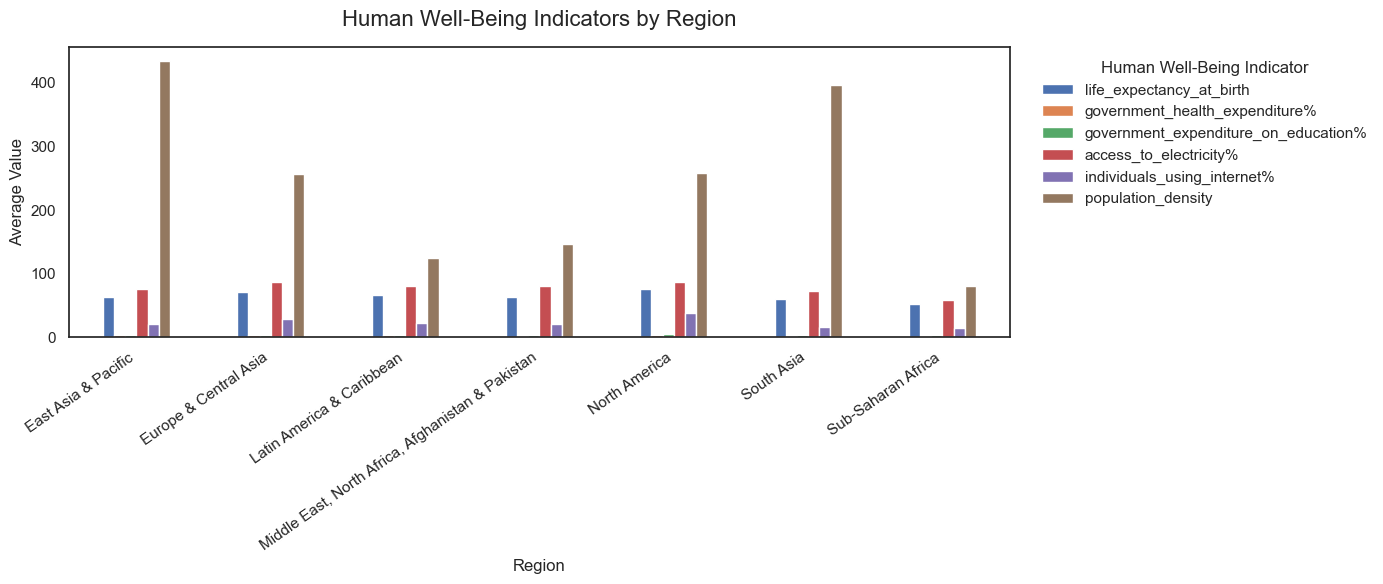

In [81]:
# Human Well-Being Indicators by Region


plt.figure(figsize=(14,6))

df.groupby('Region')[well_cols].mean().plot(
    kind='bar',
    figsize=(14,6),
)

plt.title('Human Well-Being Indicators by Region', fontsize=16, pad=15)
plt.xlabel('Region')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')

# Clean legend on the right side
plt.legend(
    title='Human Well-Being Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

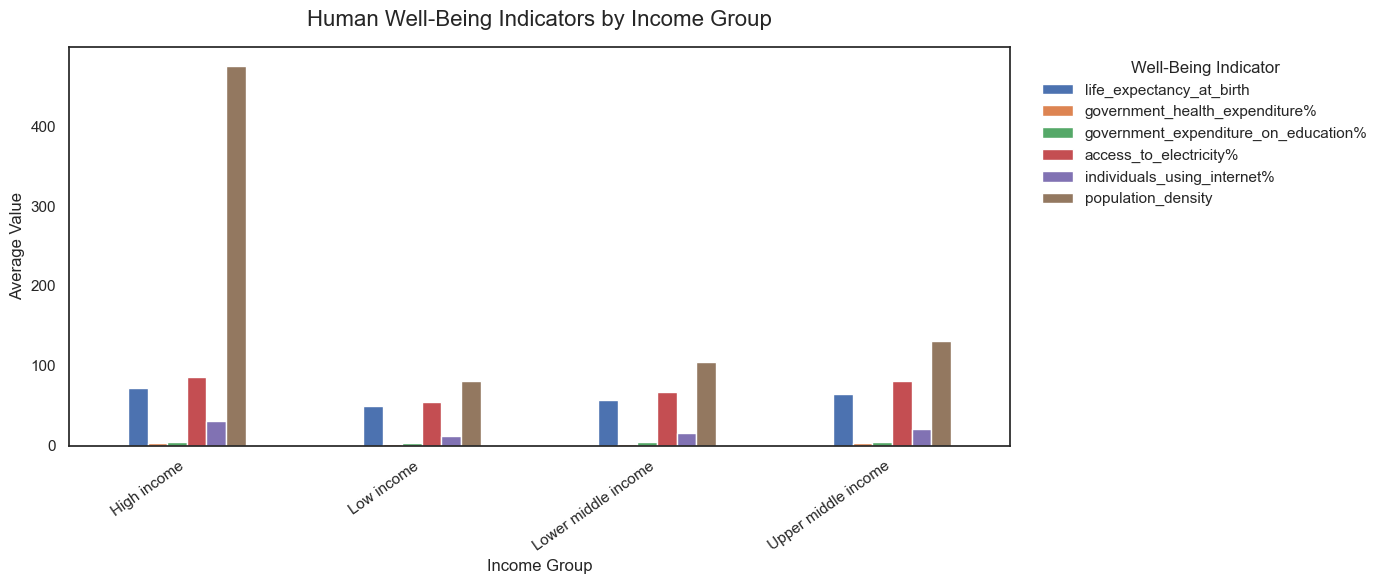

In [82]:
# Human Well-Being Indicators by Income Group

plt.figure(figsize=(14,6))

df.groupby('Income group')[well_cols].mean().plot(
    kind='bar',
    figsize=(14,6),
)

plt.title('Human Well-Being Indicators by Income Group', fontsize=16, pad=15)
plt.xlabel('Income Group')
plt.ylabel('Average Value')
plt.xticks(rotation=35, ha='right')

# Move legend outside, clean
plt.legend(
    title='Well-Being Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

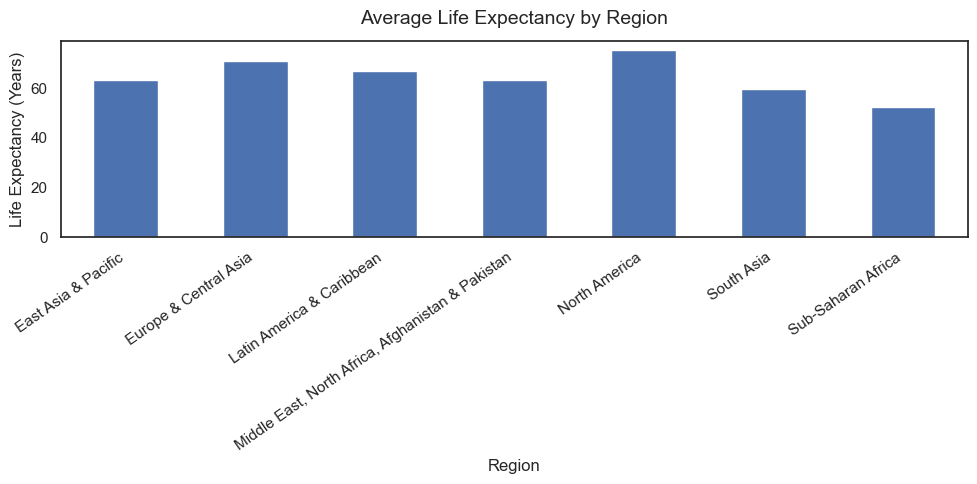

In [83]:
# Average Life Expectancy by Region

plt.figure(figsize=(10,5))

df.groupby('Region')['life_expectancy_at_birth'].mean().plot(
    kind='bar',
    figsize=(10,5),
)

plt.title('Average Life Expectancy by Region', fontsize=14, pad=12)
plt.xlabel('Region')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=35, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

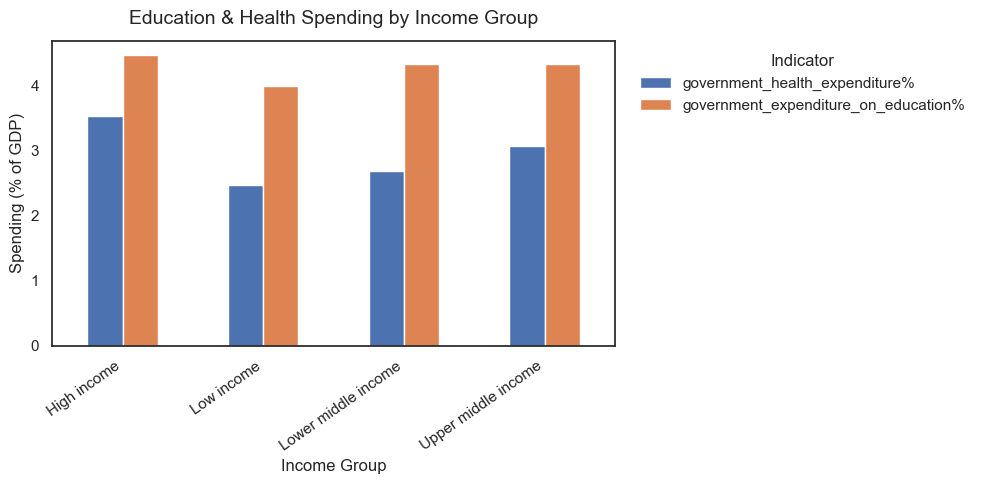

In [84]:
# Education & Health Spending by Income Group

plt.figure(figsize=(10,5))

df.groupby('Income group')[['government_health_expenditure%', 
                            'government_expenditure_on_education%']].mean().plot(
    kind='bar',
    figsize=(10,5),
)

plt.title('Education & Health Spending by Income Group', fontsize=14, pad=12)
plt.xlabel('Income Group')
plt.ylabel('Spending (% of GDP)')
plt.xticks(rotation=35, ha='right')

plt.legend(
    title='Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

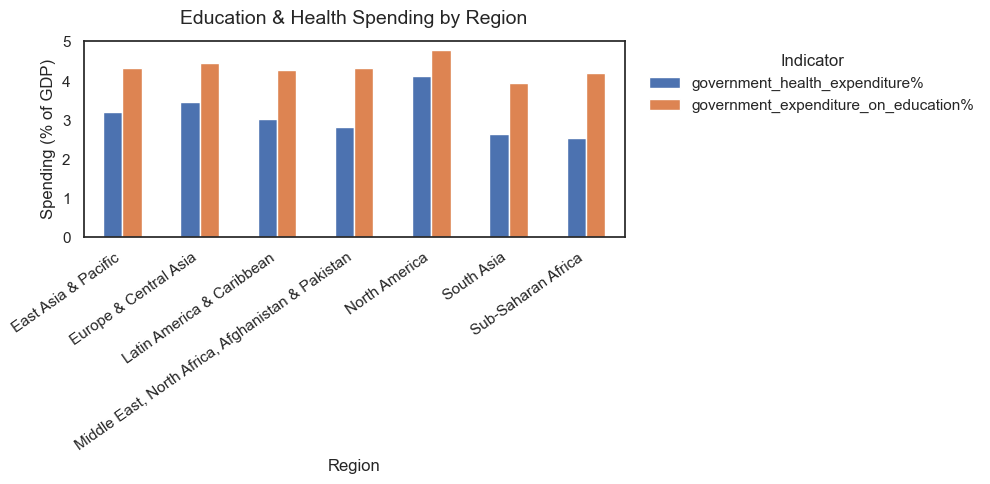

In [85]:
# Education & Health Spending by Income Group

plt.figure(figsize=(10,5))

df.groupby('Region')[['government_health_expenditure%', 
                      'government_expenditure_on_education%']].mean().plot(
    kind='bar',
    figsize=(10,5),
)

plt.title('Education & Health Spending by Region', fontsize=14, pad=12)
plt.xlabel('Region')
plt.ylabel('Spending (% of GDP)')
plt.xticks(rotation=35, ha='right')

plt.legend(
    title='Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

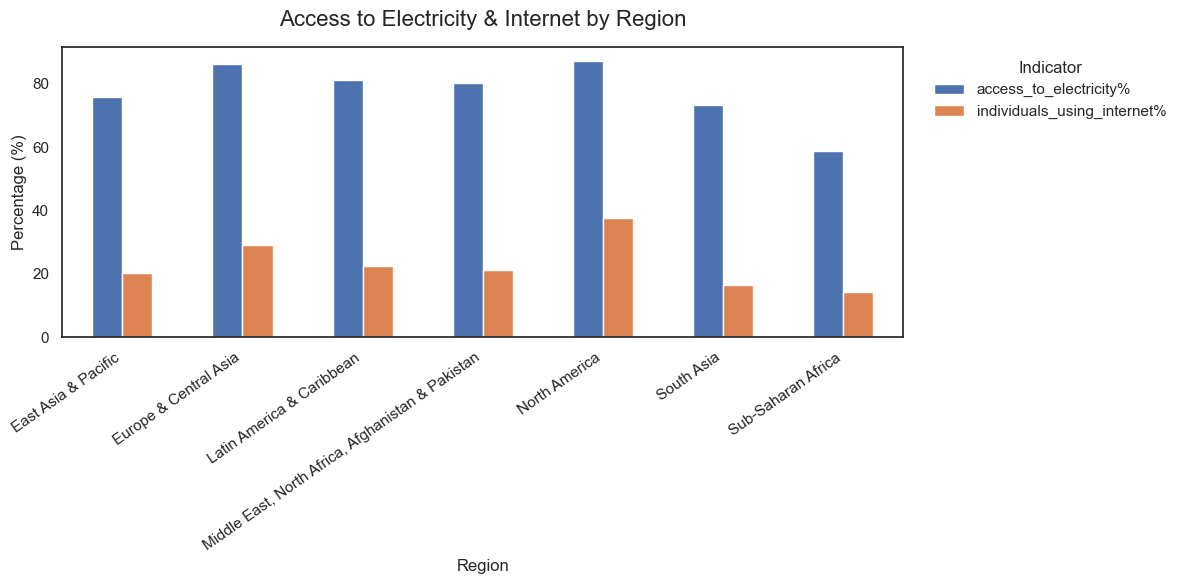

In [86]:
# Access to Electricity & Internet by Region

plt.figure(figsize=(12,6))

df.groupby('Region')[['access_to_electricity%', 
                      'individuals_using_internet%']].mean().plot(
    kind='bar',
    figsize=(12,6),

)

plt.title('Access to Electricity & Internet by Region', fontsize=16, pad=15)
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=35, ha='right')


plt.legend(
    title='Indicator',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

plt.subplots_adjust(right=0.80, bottom=0.25)
plt.tight_layout()
plt.show()

Human well-being and health show major global inequalities. High-income and European/OECD regions perform strongest, with high life expectancy, near-universal electricity access, high internet usage, and large investments in health and education.

Low-income and Sub-Saharan African countries show the lowest human development outcomes, including limited access to essential services, lower life expectancy, and weaker health and education systems.